In [1]:
%run ../src/Arrows.py
%run ../src/Pitch.py
%run ../src/scraper.py
%run ../src/my_utils.py
%run ../src/waffle.py
%run ../src/radar.py
%run ../src/shot_utils

In [1]:
import math
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import Axes
from matplotlib import patches
from matplotlib.patches import FancyArrowPatch
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import RegularPolygon
from matplotlib.path import Path
from matplotlib.patches import Wedge
from matplotlib.patches import PathPatch
import matplotlib.patheffects as path_effects
from matplotlib import colors
from matplotlib import rcParams
from pywaffle import Waffle
import seaborn as sns
import json
from selenium import webdriver
from highlight_text import ax_text, fig_text
from adjustText import adjust_text

import requests
import PIL, io, sys
from PIL import Image

from mplsoccer import FontManager

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
def dual_half_circle(center, radius, angle=0, ax=None, colors=('w','k'),
                     **kwargs):
    """
    Add two half circles to the axes *ax* (or the current axes) with the 
    specified facecolors *colors* rotated at *angle* (in degrees).
    """
    if ax is None:
        ax = plt.gca()
    theta1, theta2 = angle, angle + 180
    w1 = Wedge(center, radius, theta1, theta2, fc=colors[0], **kwargs)
    w2 = Wedge(center, radius, theta2, theta1, fc=colors[1], **kwargs)
    for wedge in [w1, w2]:
        ax.add_artist(wedge)
    return [w1, w2]

In [4]:
def adjustFigAspect(fig,aspect=1):
    '''
    Adjust the subplot parameters so that the figure has the correct
    aspect ratio.
    '''
    xsize,ysize = fig.get_size_inches()
    minsize = min(xsize,ysize)
    xlim = .4*minsize/xsize
    ylim = .4*minsize/ysize
    if aspect < 1:
        xlim *= aspect
    else:
        ylim /= aspect
    fig.subplots_adjust(left=.5-xlim,
                        right=.5+xlim,
                        bottom=.5-ylim,
                        top=.5+ylim)

In [5]:
font_normal = FontManager((
    "https://github.com/google/fonts/blob/main/apache/robotoslab/static/RobotoSlab-Regular.ttf?raw=true"
))
font_bold = FontManager((
    "https://github.com/google/fonts/blob/main/apache/robotoslab/static/RobotoSlab-Bold.ttf?raw=true"
))
font_medium = FontManager((
    "https://github.com/google/fonts/blob/main/apache/robotoslab/static/RobotoSlab-Medium.ttf?raw=true"
))
font_italic = FontManager((
    "https://github.com/google/fonts/blob/main/apache/arimo/static/Arimo-Italic.ttf?raw=true"
))

## Heatmap

In [56]:
df_1 = pd.read_pickle("wolves_event.pkl")
df_2 = pd.read_pickle("burn_event.pkl")
df_3 = pd.read_pickle("spurs_event.pkl")
df_4 = pd.read_pickle("utd_event.pkl")

df = pd.concat(
    [df_1, df_2, df_3, df_4]
).reset_index(drop=True)

df["corner_taken"] = df["qualifiers"].apply(lambda x: is_corner(x))

df = df.loc[
    (df["corner_taken"] == False) & 
    (df["type_displayName"] != "Foul")
]

m = pd.to_numeric(df['x']).notna()

df.loc[m,['x','y']] = df.loc[m,['y','x']].values

df['x'] = 68 - df['x']

df.shape

(210, 43)

In [57]:
cmap = sns.color_palette("dark:#0587df", as_cmap=True)
color_list = []

for i in range(cmap.N):
    rgba = cmap(i)
    color_list.append(mpl.colors.rgb2hex(rgba))

In [58]:
legend_color = color_list[::32]
legend_color.append(color_list[-1])
legend_color

['#23262b',
 '#1f3242',
 '#1c3e58',
 '#184a6f',
 '#145785',
 '#10639c',
 '#0c6fb3',
 '#097bc9',
 '#0587df']

In [59]:
%run ../src/heatmap_.py

heatmap = Heatmap(0)

total_length = len(df)

def_pen_area = heatmap.make_matrix_pen(df, True)

def_area = heatmap.make_matrix_opp(df, True)

pen_area = heatmap.make_matrix_pen(df)

opp_area = heatmap.make_matrix_opp(df)

min_touch = np.min([np.min(def_area), np.min(pen_area), np.min(opp_area)])
max_touch = np.max([np.min(def_area), np.max(pen_area), np.max(opp_area)])

print(total_length)
print(def_pen_area)
print(def_area)
print(pen_area, opp_area)
print(min_touch, max_touch)

210
[[0. 2. 1.]]
[[ 3. 15.  5.]
 [ 1.  4.  1.]]
[[ 9. 16. 17.]] [[14. 48. 24.]
 [ 3. 30. 17.]]
1.0 48.0


In [5]:
font_normal = FontManager("https://github.com/google/fonts/blob/main/apache/roboto/static/Roboto-Regular.ttf?raw=true")
font_italic = FontManager("https://github.com/google/fonts/blob/main/apache/roboto/static/Roboto-Italic.ttf?raw=true")
font_bold = FontManager("https://github.com/google/fonts/blob/main/apache/roboto/static/Roboto-Medium.ttf?raw=true")

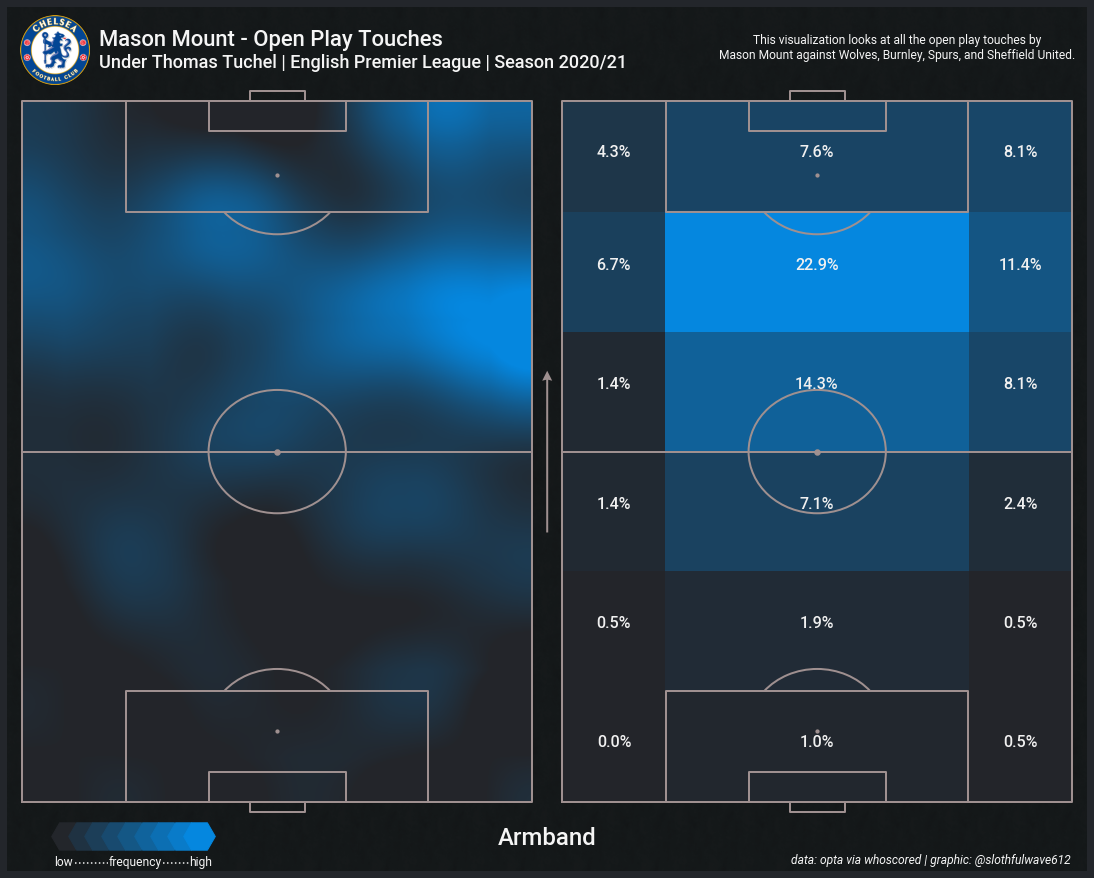

In [63]:
%run ../src/heatmap_.py
%run ../src/Pitch.py

text_color="#F5F5F5"

heatmap = Heatmap(total_length)

matrix = heatmap.make_matrix(
    df, (6, 8), 68, 104
)

fig, axes = plt.subplots(1, 2, figsize=(15,12), facecolor="#23262b")

image = plt.imread("black_03.jpg")

for i, ax in enumerate(fig.get_axes()):
    ax.set(xlim=(-2, 70), ylim=(-10.2, 118))
    
    ax.imshow(image, extent=[-2, 70, -10.2, 118], aspect="auto")
    
    ax.axis("off")
    
plt.subplots_adjust(0, 0, 1, 1, wspace=0, hspace=0)

ax_1, ax_2 = fig.get_axes()

pitch = Pitch(
    line_color="#9F9090", pitch_color="none", orientation="vertical", plot_arrow=False
)
pitch_2 = Pitch(
    line_color="#9F9090", pitch_color="none", orientation="vertical", arrow_color="#9F9090"
)

fig, ax_1 = pitch.create_pitch(figax=(fig, ax_1))
fig, ax_2 = pitch_2.create_pitch(figax=(fig, ax_2))

cmap = sns.color_palette("dark:#0587df", as_cmap=True)

ax_1.imshow(matrix, extent=[0, 68, 0, 104], cmap=cmap, interpolation="sinc", aspect="auto", vmin=0)

ax_2 = heatmap.show_pen(
    def_pen_area, ax_2,
    kwargs_show=dict(cmap=cmap,  interpolation="none", aspect="auto", vmin=min_touch, vmax=max_touch),
    kwargs_text=dict(color="#F0F0F0", size=16, ha="center", fontproperties=font_bold.prop),
    def_area=True, annotate=True
)

ax_2 = heatmap.show_opp(
    def_area, ax_2, 
    kwargs_show=dict(cmap=cmap, interpolation="none", aspect="auto", vmin=min_touch, vmax=max_touch),  
    kwargs_text=dict(color="#F0F0F0", size=16, ha="center", va="bottom", fontproperties=font_bold.prop),
    def_area=True, annotate=True
)

ax_2 = heatmap.show_pen(
    pen_area, ax_2, 
    kwargs_show=dict(cmap=cmap, interpolation="none", aspect="auto", vmin=min_touch, vmax=max_touch),
    kwargs_text=dict(color="#F0F0F0", size=16, ha="center", fontproperties=font_bold.prop), 
    def_area=False, annotate=True
)

ax_2 = heatmap.show_opp(
    opp_area, ax_2, 
    kwargs_show=dict(cmap=cmap, interpolation="none", aspect="auto", vmin=min_touch, vmax=max_touch),
    kwargs_text=dict(color="#F0F0F0", size=16, ha="center", va="bottom", fontproperties=font_bold.prop),
    def_area=False, annotate=True
)

ax_1 = heatmap.add_legend(ax_1, legend_color, 1000, 'H', color=text_color, size=12, ha="center", fontproperties=font_normal.prop)

fig = add_image(
    "../logos/Chelsea.png", fig, 0.004, 0.91, 0.08, 0.08
)
fig.text(
    0.085, 0.955, "Mason Mount - Open Play Touches", color=text_color, size=22, fontproperties=font_bold.prop
)
fig.text(
    0.085, 0.93, "Under Thomas Tuchel | English Premier League | Season 2020/21", color=text_color, size=18, fontproperties=font_bold.prop
)
fig.text(
    0.5, 0.03, "Armband", color=text_color, size=24, fontproperties=font_bold.prop, ha="center"
)
fig.text(
    0.985, 0.008, "data: opta via whoscored | graphic: @slothfulwave612", color=text_color, size=12, fontproperties=font_italic.prop, ha="right"
)
fig.text(
    0.824, 0.94, "This visualization looks at all the open play touches by\nMason Mount against Wolves, Burnley, Spurs, and Sheffield United.", ha="center",
    size=12, fontproperties=font_normal.prop, color=text_color
)

arrow = Arrows.Arrow(arrow_type="simple_arrows")
ax_1 = arrow.plot_arrow(
    ax_1, 70, 40, 70, 64, color="#9F9090",
    width=2, headlength=5, headwidth=5, zorder=4
)

plt.show()

In [64]:
fig.savefig("../plots/Armband/04_mason_mount/03_heatmap_touches_2.jpg", bbox_inches="tight", dpi=400, pad_inches=0)

## Waffle Charts

In [77]:
%run ../src/waffle.py

point_list = list(u_25_minutes.values())
player_list = list(u_25_minutes.keys())

coord_list = get_coord_list()
coord_list = coord_after_rotation(coord_list)
fig, ax = make_waffle(4, 3, 11, coord_list, point_list, player_list)

add_image("../logos/isl_2.png", fig, 0.15, 0.89, 0.07, 0.055)

plot_text_fig(fig, x=0.22, y=0.92, s="INDIAN SUPER LEAGUE - SEASON 2020-21", size=40, color="#F2F2F2")
plot_text_fig(fig, x=0.22, y=0.905, s="Percentage of Total Minutes Given To U25 Indian Players", size=26, color="#F2F2F2")
plot_text_fig(fig, x=0.895, y=0.9125, s="Armband", size=36, color="#F2F2F2", fontweight="roman", ha="right")
# # plot_text_fig(fig, x=0.135, y=0.1, s="**the bracket contains the age of each player", size=20, color="#F2F2F2", fontstyle="italic")
plot_text_fig(fig, x=0.895, y=0.125, s="data: wyscout | graphic: @slothfulwave612", size=20, color="#F2F2F2", fontstyle="italic", ha="right")

In [62]:
fig.savefig("../plots/Armband/03_hyd_fc/team_time_u25.jpg", dpi=320, bbox_inches="tight")

## Radar Charts

In [4]:
df = pd.read_pickle("../_data_/top_5.pkl")

df.loc[
    df["player"] == "Mason Mount"
]

player nationality position    squad     age birth_year  games  \
310  Mason Mount     eng ENG    MF,FW  Chelsea  22-031       1999   22.0   

     games_starts  minutes  goals  assists  pens_made  pens_att  cards_yellow  \
310          20.0   1798.0    3.0      3.0        0.0       0.0           2.0   

     cards_red  goals_per90  assists_per90  goals_assists_per90  \
310        0.0         0.15           0.15                  0.3   

     goals_pens_per90  goals_assists_pens_per90   xg  npxg   xa  xg_per90  \
310              0.15                       0.3  3.0   3.0  4.0      0.15   

     xa_per90  xg_xa_per90  npxg_per90  npxg_xa_per90  minutes_90s  \
310       0.2         0.35        0.15           0.35         20.0   

     shots_total  shots_on_target  shots_free_kicks  shots_on_target_pct  \
310         44.0             12.0               5.0                 27.3   

     shots_total_per90  shots_on_target_per90  goals_per_shot  \
310                2.2                    0.6            0.07   

     goals_per_shot_on_target  npxg_per_shot  xg_net  npxg_net  \
310                      0.25           0.07     0.0       0.0   

     passes_completed  passes  passes_pct  passes_total_distance  \
310            1007.0  1205.0        83.6                18150.0   

     passes_progressive_distance  passes_completed_short  passes_short  \
310                       4957.0                   480.0         523.0   

     passes_pct_short  passes_completed_medium  passes_medium  \
310              91.8                    358.0          408.0   

     passes_pct_medium  passes_completed_long  passes_long  passes_pct_long  \
310               87.7                  138.0        202.0             68.3   

     xa_net  assisted_shots  passes_into_final_third  \
310    -1.0            58.0                    102.0   

     passes_into_penalty_area  crosses_into_penalty_area  progressive_passes  \
310                      32.0                        4.0               116.0   

     passes_live  passes_dead  passes_free_kicks  through_balls  \
310       1071.0        134.0               19.0            4.0   

     passes_pressure  passes_switches  crosses  corner_kicks  corner_kicks_in  \
310            140.0             56.0     34.0          86.0             25.0   

     corner_kicks_out  corner_kicks_straight  passes_ground  passes_low  \
310              43.0                    5.0          908.0       129.0   

     passes_high  passes_left_foot  passes_right_foot  passes_head  throw_ins  \
310        168.0             136.0             1016.0         27.0        9.0   

     passes_other_body  passes_offsides  passes_oob  passes_intercepted  \
310                6.0              4.0        11.0                20.0   

     passes_blocked   sca  sca_per90  sca_passes_live  sca_passes_dead  \
310            46.0  89.0       4.45             49.0             31.0   

     sca_dribbles  sca_shots  sca_fouled  gca  gca_per90  gca_passes_live  \
310           4.0        2.0         2.0  8.0        0.4              2.0   

     gca_passes_dead  gca_dribbles  gca_shots  gca_fouled  gca_og_for  \
310              4.0           0.0        2.0         0.0         0.0   

     tackles  tackles_won  tackles_def_3rd  tackles_mid_3rd  tackles_att_3rd  \
310     50.0         33.0             21.0             20.0              9.0   

     dribble_tackles  dribbles_vs  dribble_tackles_pct  dribbled_past  \
310             12.0         45.0                 26.7           33.0   

     pressures  pressure_regains  pressure_regain_pct  pressures_def_3rd  \
310      415.0             127.0                 30.6               96.0   

     pressures_mid_3rd  pressures_att_3rd  blocks  blocked_shots  \
310              194.0              125.0    26.0            1.0   

     blocked_shots_saves  blocked_passes  interceptions  clearances  errors  \
310                  0.0            25.0           25.0        13.0     0.0   

     touches  touches_def

In [69]:
text_color = "#F0F0F0"

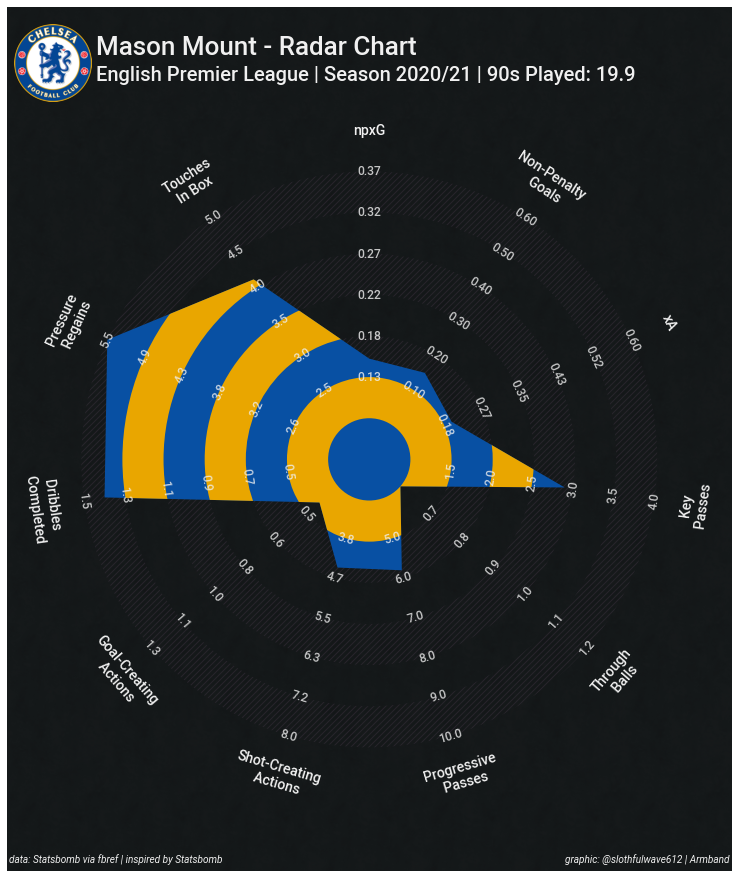

In [99]:
%run ../src/radar


fig, ax = plt.subplots(figsize=(20,12))

ax = Axes(plt.gcf(),[0, 0, 1, 1],yticks=[],xticks=[],frame_on=False, aspect="equal")
plt.gcf().delaxes(plt.gca())
plt.gcf().add_axes(ax)

name = "../plots/Armband/04_mason_mount/04_radar_this_season.jpg"

image = plt.imread("black_03.jpg")
ax.imshow(image, zorder=0, extent=[-10, 10, -10, 14], aspect="equal")

# inputs
params = ["npxG", "Non-Penalty\n Goals", "xA", "Key\n Passes", "Through\n Balls",
          "Progressive\n Passes",
          "Shot-Creating\n Actions", "Goal-Creating\n Actions", "Dribbles\n Completed",
          "Pressure\n Regains", "Touches\nIn Box"]

values = [0.15, 0.15, 0.2, 2.9, 0.2, 5.81, 4.45, 0.4, 1.4, 6.36, 4.1]

# values_compare = [0.32, 0.00, 0.43, 3.50, 0.98,  7.72, 6.18, 0.98, 1.71, 4.88, 4.96]

low = [0.08, 0.00, 0.10, 1.00, 0.60,  4.00, 3.00, 0.30, 0.30, 2.00, 2.00]

high = [0.37, 0.60, 0.60, 4.00, 1.20, 10.00, 8.00, 1.30, 1.50, 5.50, 5.00]


radar = Radar(params, low, high, num_rings=6, center_circle_radius=1)

rings_inner = radar.draw_circles(
    ax=ax, inner=True, facecolor='none', edgecolor='#28252C', lw=0, zorder=1, alpha=1, hatch=2*'//'
)

radar_output = radar.draw_radar(
    values, ax=ax, kwargs_radar={'facecolor': '#0850A3', 'alpha': 1}, kwargs_rings={'facecolor': '#E9A600', 'alpha': 1}
)

radar_poly, rings_outer, vertices = radar_output

range_labels = radar.draw_range_labels(ax=ax, fontproperties=font_bold.prop, fontsize=12, color=text_color, alpha=0.8)
param_labels = radar.draw_param_labels(ax=ax, fontproperties=font_bold.prop, fontsize=14, color=text_color)

ax.set(xlim=(-8.8, 8.8), ylim=(-10, 11))

# add image
fig = add_image(
    "../logos/Chelsea.png", fig, 0.235, 0.89, 0.09, 0.09
)

fig.text(0.31, 0.945, "Mason Mount - Radar Chart", color=text_color, fontproperties=font_bold.prop, size=26)
fig.text(0.31, 0.915, "English Premier League | Season 2020/21 | 90s Played: 19.9", color=text_color, fontproperties=font_bold.prop, size=20)
fig.text(0.25, 0.01, "data: Statsbomb via fbref | inspired by Statsbomb", color=text_color, fontproperties=font_italic.prop, size=10)
fig.text(0.75, 0.01, "graphic: @slothfulwave612 | Armband", color=text_color, fontproperties=font_italic.prop, size=10, ha="right")

fig.savefig(name, bbox_inches="tight", pad_inches=0, dpi=500)

plt.show()

## Radar Compare

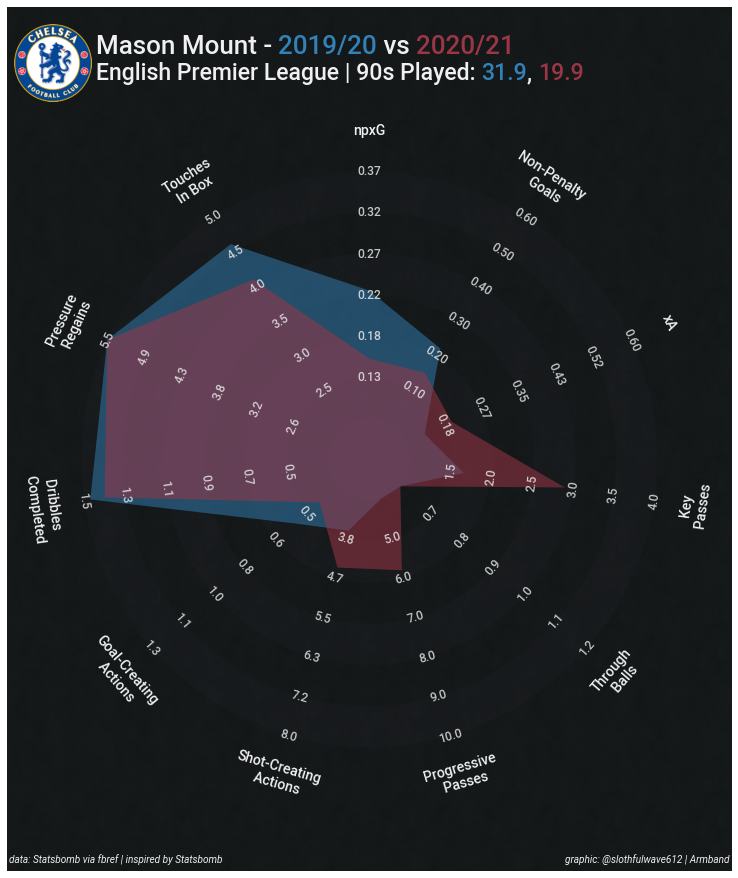

In [97]:
fig, ax = plt.subplots(figsize=(20,12))

ax = Axes(plt.gcf(),[0, 0, 1, 1],yticks=[],xticks=[],frame_on=False, aspect="equal")
plt.gcf().delaxes(plt.gca())
plt.gcf().add_axes(ax)

name = "../plots/Armband/04_mason_mount/04_radar_compare.jpg"

image = plt.imread("black_03.jpg")
ax.imshow(image, zorder=0, extent=[-10, 10, -10, 14], aspect="equal")

# inputs
params = ["npxG", "Non-Penalty\n Goals", "xA", "Key\n Passes", "Through\n Balls",
          "Progressive\n Passes",
          "Shot-Creating\n Actions", "Goal-Creating\n Actions", "Dribbles\n Completed",
          "Pressure\n Regains", "Touches\nIn Box"]

values = [0.15, 0.15, 0.2, 2.9, 0.2, 5.81, 4.45, 0.4, 1.4, 6.36, 4.1]

values_compare = [0.23, 0.22, 0.14, 1.66, 0.13, 3.26, 3.67, 0.53, 1.47, 6.39, 4.61]

low = [0.08, 0.00, 0.10, 1.00, 0.60,  4.00, 3.00, 0.30, 0.30, 2.00, 2.00]

high = [0.37, 0.60, 0.60, 4.00, 1.20, 10.00, 8.00, 1.30, 1.50, 5.50, 5.00]


radar = Radar(params, low, high, num_rings=6, center_circle_radius=1)

rings_inner = radar.draw_circles(
    ax=ax, inner=True, facecolor='#28252C', edgecolor='#28252C', lw=0, zorder=1, alpha=0.2
)

radar_output = radar.draw_radar_compare(
    values_compare, values_compare=values,
    ax=ax, kwargs_radar={'facecolor': '#3282b8', 'alpha': 0.5}, 
    kwargs_compare={'facecolor': '#9B3647', 'alpha': 0.55}
)

radar_poly1, radar_poly2, vertices1, vertices2 = radar_output

range_labels = radar.draw_range_labels(ax=ax, fontproperties=font_bold.prop, fontsize=12, color=text_color, alpha=0.8)
param_labels = radar.draw_param_labels(ax=ax, fontproperties=font_bold.prop, fontsize=14, color=text_color)

ax.set(xlim=(-8.8, 8.8), ylim=(-10, 11))

# add image
fig = add_image(
    "../logos/Chelsea.png", fig, 0.235, 0.89, 0.09, 0.09
)

fig_text(
    0.31, 0.94, "Mason Mount - <2019/20> vs <2020/21>", highlight_colors=["#3282b8", "#9B3647"],
    fig=fig, color=text_color, fontproperties=font_bold.prop, size=26, 
)

fig_text(
    0.31, 0.91, "English Premier League | 90s Played: <31.9>, <19.9>", highlight_colors=["#3282b8", "#9B3647"],
    fig=fig, color=text_color, fontproperties=font_bold.prop, size=23, 
)

fig.text(0.25, 0.01, "data: Statsbomb via fbref | inspired by Statsbomb", color=text_color, fontproperties=font_italic.prop, size=10)
fig.text(0.75, 0.01, "graphic: @slothfulwave612 | Armband", color=text_color, fontproperties=font_italic.prop, size=10, ha="right")

fig.savefig(name, bbox_inches="tight", pad_inches=0, dpi=500)

plt.show()

## Scatter Plot

In [47]:
df = pd.read_csv("../_data_/barca/keepers.csv")
df.drop("Rk", axis=1, inplace=True)
df["Player"] = df["Player"].apply(lambda x: x.split("\\")[0])

df = df[["Player", "Squad", "90s", "GA", "OG", "PSxG"]]

df["90s"] = df["90s"].astype(float)
df["GA"] = df["GA"].astype(int)
df["OG"] = df["OG"].astype(int)
df["PSxG"] = df["PSxG"].astype(float)

df = df.loc[
    df["90s"] > 13.33
].reset_index(drop=True)

df["goals_against_gk"] = df["GA"] - df["OG"]
df["goals_against_gk"] = round(df["goals_against_gk"] / df["90s"], 2)
df["PSxG"] = round(df["PSxG"] / df["90s"], 2)
df["goal_prevented"] = df["PSxG"] - df["goals_against_gk"]

df = df.sort_values(by="goal_prevented", ascending=False).reset_index(drop=True)

In [48]:
df.head()

Player            Squad   90s  GA  OG  PSxG  goals_against_gk  \
0    Alphonse Areola           Fulham  29.0  35   1  1.42              1.17   
1          Jan Oblak  Atlético Madrid  28.0  18   3  0.79              0.54   
2          Nick Pope          Burnley  28.0  32   1  1.32              1.11   
3       Keylor Navas        Paris S-G  21.5  14   0  0.85              0.65   
4  Emiliano Martínez      Aston Villa  28.0  30   0  1.26              1.07   

   goal_prevented  
0            0.25  
1            0.25  
2            0.21  
3            0.20  
4            0.19

In [50]:
df.loc[df["Player"] == 'Jan Oblak']

Player            Squad   90s  GA  OG  PSxG  goals_against_gk  \
1  Jan Oblak  Atlético Madrid  28.0  18   3  0.79              0.54   

   goal_prevented  
1            0.25

In [91]:
players = [
   'Anthony Racioppi', 'Jan Oblak', 'Keylor Navas',
   'Sergio Herrera', 'Robert Sánchez', "Edouard Mendy",
   'Alessio Cragno', "Ralf Fährmann",
   'Manuel Neuer', "Alphonse Areola",
   'Marko Dmitrović', "Alex Cordaz", "Álex Remiro",
   'Ederson', "Sergio Asenjo", "Roman Bürki",
   'Sam Johnstone', 'Paul Nardi', "Salvatore Sirigu", "Benjamin Lecomte"
]

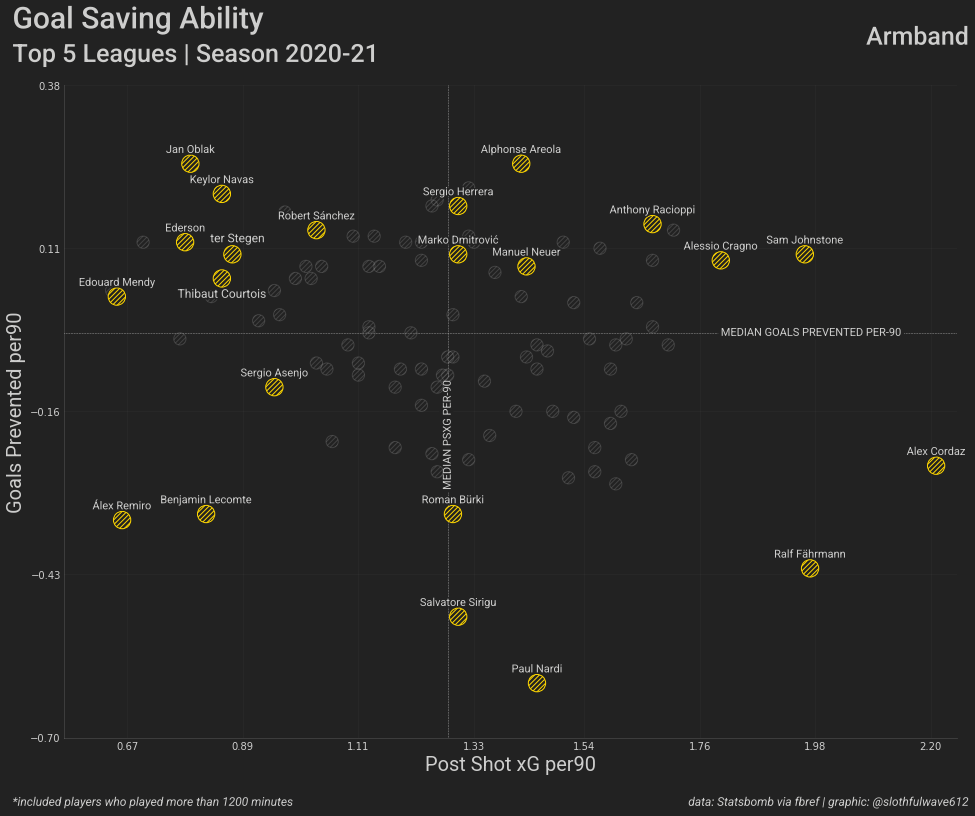

In [103]:
# hex-code: a shade of black
background_color = "#222222"

# hex-code: a shade of yellow
scatter_color = "#FFD700"

# hex-code: a shade of black
secondary_color = "#C0C0C0"

# hex-code: a shade of white
text_color = "#CECECD"

# create a subplot
fig, ax = plt.subplots(
    facecolor=background_color, figsize=(16, 12)
)

# set the background color for the axes
ax.set_facecolor(background_color)

# iterate the dataframe
for _, row_val in df.iterrows():
    
#     if row_val["Player"] in players or row_val["Player"] in ["Marc-André ter Stegen", "Thibaut Courtois"]:
#         if row_val["Player"] == "Marc-André ter Stegen":
#             # specify the values
#             alpha, s, ec = 1, 300, scatter_color
#         else:
#             alpha, s, ec = 0.3, 200, scatter_color

#     else:
#         # specify the values
#         alpha, s, ec = 0.2, 150, secondary_color

    if row_val["Player"] in players or row_val["Player"] in ["Marc-André ter Stegen", "Thibaut Courtois"]:
        # specify the values
        alpha, s, ec = 1, 300, scatter_color
    else:
        # specify the values
        alpha, s, ec = 0.2, 150, secondary_color
        
    ax.scatter(
        row_val["PSxG"], row_val["goal_prevented"],
        s=s, hatch=5*"/", edgecolor=ec, fc=background_color, alpha=alpha, zorder=4
    )

# player names with their coordinate locations    
text_values = df.loc[
    df["Player"].isin(players),
    ["PSxG", "goal_prevented", "Player"]
].values

# make an array of text
texts = [
    ax.text(
        val[0], val[1], val[2], 
        size=11, color=text_color, zorder=5, 
        fontproperties=font_normal.prop, alpha=0.3
    )for val in text_values
]

# set path_effects
[text.set_path_effects([mpl.patheffects.withStroke(linewidth=3, foreground=background_color)]) for text in texts]

# use adjust_text
adjust_text(
    texts, autoalign='y', 
    only_move={'points':'xy', 'text':'xy'}, 
    force_objects=(0, 15), force_text=(0, 7), 
    force_points=(0, 10)
)

plot_text_ax(
    ax, "#222222", x=0.88, y=0.12, s="ter Stegen", size=12,
    color=text_color, zorder=5, fontproperties=font_normal.prop, ha="center"
)
plot_text_ax(
    ax, "#222222", x=0.85, y=0.028, s="Thibaut Courtois", size=12, alpha=,
    color=text_color, zorder=5, fontproperties=font_normal.prop, ha="center"
)


# add x-label and y-label
ax.set_xlabel(
    "Post Shot xG per90", color=text_color,
    fontsize=20, fontproperties=font_normal.prop
)
ax.set_ylabel(
    "Goals Prevented per90",color=text_color,
    fontsize=20, fontproperties=font_normal.prop
)

median_x = df["PSxG"].median()
median_y = df["goal_prevented"].median()

# plot medians
ax.plot([median_x, median_x], [-0.8, df["goal_prevented"].max() + 0.5], color=text_color, ls="--", lw=0.5, alpha=0.7, zorder=1)
ax.plot([0.0, df["PSxG"].max() + 0.5], [median_y, median_y], color=text_color, ls="--", lw=0.5, alpha=0.7, zorder=1)

# annotate the median lines --> list containing dict of values for text method
text_values = [
    {
        'x': median_x, 'y': -0.2, 's': "MEDIAN PSXG PER-90", "color": text_color, 
        "ha": "center", "va": "center", "rotation": 90, "fontsize": 11, "zorder": 2, "fontproperties": font_normal.prop
    },
    {
        'x': 1.8, 'y': median_y, 's': "MEDIAN GOALS PREVENTED PER-90", "color": text_color, 
        "ha": "left", "va": "center", "fontsize": 11, "zorder": 2, "fontproperties": font_normal.prop
    }
]

# plot the texts
texts = [ax.text(**txt) for txt in text_values]

# set path_effects
[txt.set_path_effects([mpl.patheffects.withStroke(linewidth=7, foreground=background_color)]) for txt in texts]

# turn off the spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# set color and alpha value for spines
ax.spines["left"].set_color(text_color)
ax.spines["bottom"].set_color(text_color)
ax.spines["left"].set_alpha(0.2)
ax.spines["bottom"].set_alpha(0.2)

# set color for tick-params
ax.tick_params(axis="both", which="both", length=0, colors=text_color)

# set the tick values
ax.set_xticks(np.round(np.linspace(0.67, 2.2, 8), 2))
ax.set_yticks(np.round(np.linspace(-0.7, 0.38, 5), 2))

# set the grid
ax.grid(b=True, alpha=0.05, axis="both")


# title, sub-title and credits --> list containing dict of values for text method
text_values_ = [
    {
        'x': 0.08, 'y': 0.955, 's': "Goal Saving Ability", "color": text_color, 
        "ha": "left", "va": "center", "fontsize": 30, "fontproperties": font_bold.prop
    },
    {
        'x': 0.08, 'y': 0.915, 's': "Top 5 Leagues | Season 2020-21", "color": text_color, 
        "ha": "left", "va": "center", "fontsize": 25, "fontproperties": font_bold.prop
    },
    {
        'x': 0.91, 'y': 0.935, 's': "Armband", "color": text_color, 
        "ha": "right", "va": "center", "fontsize": 25, "fontproperties": font_bold.prop
    },
    {
        'x': 0.91, 'y': 0.05, 's': "data: Statsbomb via fbref | graphic: @slothfulwave612", "color": text_color, 
        "ha": "right", "va": "center", "fontsize": 12, "fontproperties": font_italic.prop
    },
    {
        'x': 0.08, 'y': 0.05, 's': "*included players who played more than 1200 minutes", "color": text_color, 
        "ha": "left", "va": "center", "fontsize": 12, "fontproperties": font_italic.prop
    }
]

# plot the texts
texts_ = [fig.text(**txt) for txt in text_values_]

# set path_effects
[txt.set_path_effects([mpl.patheffects.withStroke(linewidth=3, foreground=background_color)]) for txt in texts_]

ax.set(xlim=(0.55, 2.25), ylim=(-0.7, 0.38))

plt.show()

In [96]:
fig.savefig("../plots/Armband/05_barca_defence/15_gk_2.jpg", dpi=500, bbox_inches="tight")

## Table

In [6]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [49]:
df = pd.read_csv("../_data_/goalkeeper/keeper_other.csv")
df["Player"] = df["Player"].apply(lambda x: x.split("\\")[0])
df["Min/Goal"] = np.round(df["Min"] / df["GA"], 2)
df = df.loc[df["90s"] >= 18]

In [42]:
df_2 = pd.read_csv("../_data_/goalkeeper/keeper_laliga.csv")
df_2["Player"] = df_2["Player"].apply(lambda x: x.split("\\")[0])
df_2 = df_2.loc[df_2["90s"] >= 18]

df_2 = df_2[["Player", "PSxG"]]

In [43]:
# df.sort_values(by=)
df = df[["Player", "Squad", "Min", "GA", "CS", "Min/Goal"]].sort_values(by="Min/Goal", ascending=False).reset_index(drop=True)
df

Player            Squad   Min  GA  CS  Min/Goal
0          Jan Oblak  Atlético Madrid  3240  23  18    140.87
1     Yassine Bounou          Sevilla  2880  24  15    120.00
2   Thibaut Courtois      Real Madrid  3240  27  16    120.00
3         ter Stegen        Barcelona  2700  30  11     90.00
4        Álex Remiro    Real Sociedad  3240  37  13     87.57
5         Unai Simón    Athletic Club  3240  39   9     83.08
6        David Soria           Getafe  2430  30  10     81.00
7      Sergio Asenjo       Villarreal  3150  41   9     76.83
8     Sergio Herrera          Osasuna  2868  38  10     75.47
9      Claudio Bravo            Betis  1620  23   6     70.43
10   Marko Dmitrović            Eibar  3030  45   9     67.33
11       Joel Robles            Betis  1620  25   6     64.80
12  Jeremías Ledesma            Cádiz  2880  45   9     64.00
13       Jordi Masip       Valladolid  2070  34   2     60.88
14      Rubén Blanco       Celta Vigo  1637  27   4     60.63
15    Jaume Doménech         Valencia  2520  42   4     60.00
16  Fernando Pacheco           Alavés  3240  54   9     60.00
17   Aitor Fernández          Levante  2610  44   3     59.32
18       Édgar Badía            Elche  2700  46   5     58.70
19  Álvaro Fernández           Huesca  1800  31   4     58.06
20         Rui Silva          Granada  2880  55   8     52.36

In [45]:
df = pd.merge(df, df_2, on='Player', how='outer')
df

Player            Squad   Min  GA  CS  Min/Goal  PSxG
0          Jan Oblak  Atlético Madrid  3240  23  18    140.87  30.4
1     Yassine Bounou          Sevilla  2880  24  15    120.00  23.7
2   Thibaut Courtois      Real Madrid  3240  27  16    120.00  29.6
3         ter Stegen        Barcelona  2700  30  11     90.00  28.1
4        Álex Remiro    Real Sociedad  3240  37  13     87.57  30.8
5         Unai Simón    Athletic Club  3240  39   9     83.08  34.6
6        David Soria           Getafe  2430  30  10     81.00  29.5
7      Sergio Asenjo       Villarreal  3150  41   9     76.83  33.9
8     Sergio Herrera          Osasuna  2868  38  10     75.47  40.5
9      Claudio Bravo            Betis  1620  23   6     70.43  24.6
10   Marko Dmitrović            Eibar  3030  45   9     67.33  43.8
11       Joel Robles            Betis  1620  25   6     64.80  21.5
12  Jeremías Ledesma            Cádiz  2880  45   9     64.00  38.8
13       Jordi Masip       Valladolid  2070  34   2     60.88  35.2
14      Rubén Blanco       Celta Vigo  1637  27   4     60.63  22.8
15    Jaume Doménech         Valencia  2520  42   4     60.00  39.2
16  Fernando Pacheco           Alavés  3240  54   9     60.00  53.4
17   Aitor Fernández          Levante  2610  44   3     59.32  38.8
18       Édgar Badía            Elche  2700  46   5     58.70  45.6
19  Álvaro Fernández           Huesca  1800  31   4     58.06  28.9
20         Rui Silva          Granada  2880  55   8     52.36  50.8

Text(0.844, 0.095, 'Viz Author: Anmol Durgapal | @slothfulwave612')

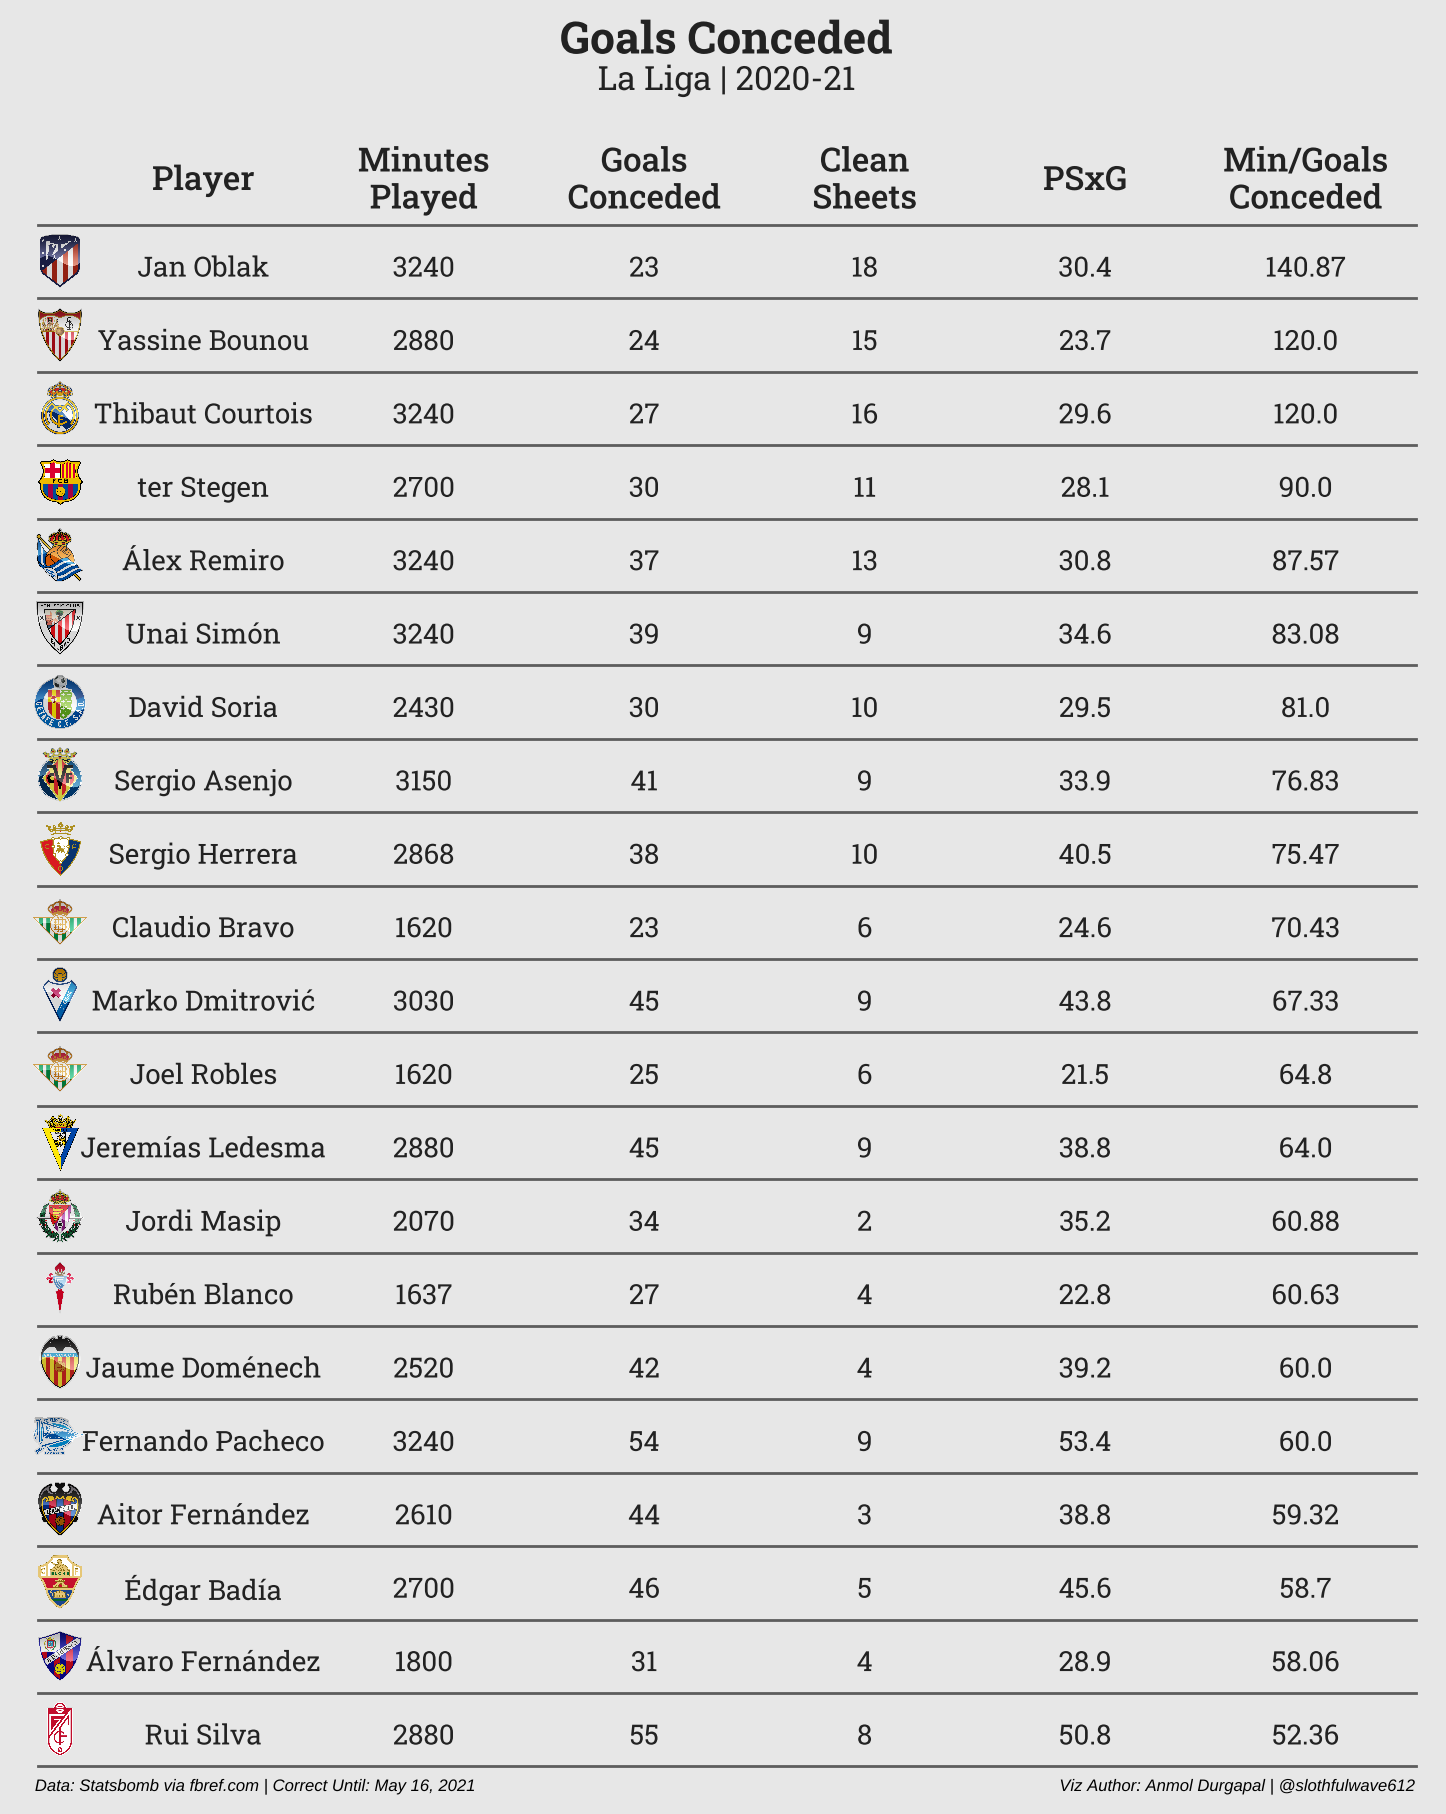

In [47]:
# colors
background_color = "#E7E7E7"
text_color = "#222222"

# create a subplot
fig, ax = plt.subplots(
    facecolor=background_color, figsize=(10,10), dpi=200
)

adjustFigAspect(fig, 7/8)

# set the background color for the axes
ax.set_facecolor(background_color)

column_01 = ["Player"] + list(df["Player"].values)

column_02 = ["Minutes\nPlayed"] + list(df["Min"].values)

column_03 = ["Goals\nConceded"] + list(df["GA"].values)

column_04 = ["Clean\nSheets"] + list(df["CS"].values)

column_05 = ["PSxG"] + list(df["PSxG"].values)

column_06 = ["Min/Goals\nConceded"] + list(df["Min/Goal"].values)

# all columns
values = [column_01, column_02, column_03, column_04, column_05, column_06]

# all images
images = [
    "Atletico Madrid.png", "Sevilla.png", "Real Madrid.png", "Barcelona.png", "Real Sociedad.png", "Athletic Bilbao.png",
    "Getafe.png", "Villareal.png", "Osasuna.png", "Real Betis.png", "Eibar.png", "Real Betis.png", "Cadiz.png", "Valladolid.png",
    "Celta Vigo.png", "Valencia.png", "Alaves.png", "Levante.png", "Elche.png", "Huesca.png", "Granada.png"
]
zoom = [0.025, 0.025, 0.025, 0.014, 0.025, 0.025, 0.025, 0.026, 0.012, 0.027, 0.026, 0.027, 0.011, 0.025, 0.025, 0.025, 0.025, 0.025, 0.013, 0.023, 0.025]

x = 6

for index in range(len(values)):
    y = 33
    for count, value in enumerate(values[index]):
        if count == 0:
            fm = font_medium.prop
            size = 12
        else:
            fm = font_normal.prop
            size = 10
            
        ax.text(
            x=x, y=y, s=value, color=text_color,
            ha="center", va="center", fontproperties=fm,
            size=size,
            path_effects=[path_effects.withStroke(linewidth=3, foreground=background_color)]
        )
        
        if count >= 1 and index == 0:
            # plot image
            image = plt.imread(f"../logos/{images[count - 1]}")
            im = OffsetImage(image, zoom=zoom[count - 1])
            ab = AnnotationBbox(im, (x-6.5, y+0.005), xycoords='data', frameon=False)
            ax.add_artist(ab)
        
        if count == 0:
            y -= 0.06
        else:
            y -= 0.05
    
    x += 10

x = [-1.5, 61]
y = 32.97

for i in range(22):
    if i == 0:
        alpha = 0.7
    else:
        alpha = 0.7
    ax.plot(
        x, [y, y], color="#222222", alpha=alpha, lw=1,
    )
    
    if i == 0:
        y -= 0.05
    else:
        y -= 0.05

ax.axis("off")

ax.set(xlim=(-2,61.5), ylim=(31.91,33))

fig.text(
    0.5, 0.97, "Goals Conceded", color=text_color, size=16, ha="center", va="center",
    fontproperties=font_bold.prop,
    path_effects=[path_effects.withStroke(linewidth=3, foreground=background_color)]
)
fig.text(
    0.5, 0.95, "La Liga | 2020-21", color=text_color, size=12, ha="center", va="center",
    fontproperties=font_normal.prop,
    path_effects=[path_effects.withStroke(linewidth=3, foreground=background_color)]
)

fig.text(
    0.154, 0.095, "Data: Statsbomb via fbref.com | Correct Until: May 16, 2021", size=6,
    fontproperties=font_italic.prop,
    path_effects=[path_effects.withStroke(linewidth=3, foreground=background_color)]
)
fig.text(
    0.844, 0.095, "Viz Author: Anmol Durgapal | @slothfulwave612", size=6,
    fontproperties=font_italic.prop, ha="right",
    path_effects=[path_effects.withStroke(linewidth=3, foreground=background_color)]
)

# fig.savefig("../plots/Barcelona/Misc/04_goalkeeper/02_table.jpg", bbox_inches="tight", dpi=500)

In [48]:
fig.savefig("../plots/Barcelona/Misc/04_goalkeeper/02_table.jpg", bbox_inches="tight", dpi=700)

[(-1.0, 53.0), (18.0, 38.5)]

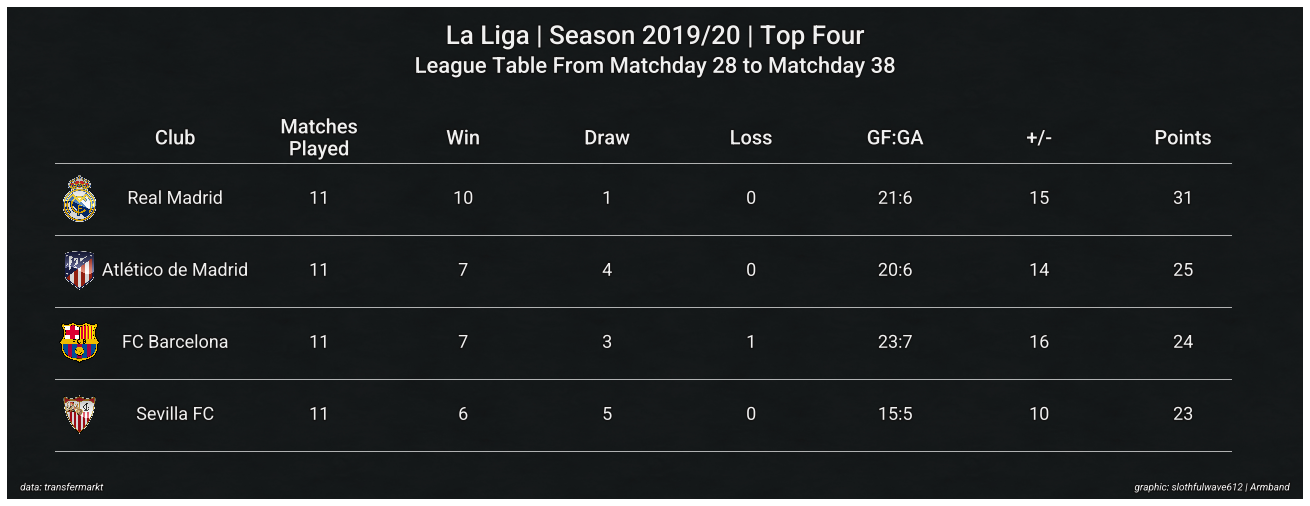

In [127]:


# ax = Axes(plt.gcf(),[0, 0, 1, 1],yticks=[],xticks=[],frame_on=False, aspect="equal")
# plt.gcf().delaxes(plt.gca())
# plt.gcf().add_axes(ax)

# image = plt.imread("../backgrounds/black_02.jpg")
# ax.imshow(image, zorder=1, extent=[-5, 100, 0, 45])


images = [
    "Real Madrid.png", "Atletico Madrid.png", "Barcelona.png", "Sevilla.png"
]
zoom = [
    0.06, 0.05, 0.035, 0.05
]

## <--------------------- COLUMN 01 --------------------->
x = 6

for index in range(len(values)):
    y = 33
    for count, value in enumerate(values[index]):
        if count == 0:
            fm = font_bold.prop
            size = 20
        else:
            fm = font_normal.prop
            size = 18
            
        plot_text_ax(
            ax, "#121212", x=x, y=y, s=value, color=text_color,
            ha="center", va="center", fontproperties=fm,
            size=size
        )
        
        if count >= 1 and index == 0:
            # plot image
            image = plt.imread(f"../logos/{images[count - 1]}")
            im = OffsetImage(image, zoom=zoom[count - 1])
            ab = AnnotationBbox(im, (x-4, y), xycoords='data', frameon=False)
            ax.add_artist(ab)
        
        if count == 0:
            y -= 2.5
        else:
            y -= 3
    
    x += 6

x = [1, 50]
y = 32

for i in range(5):
    if i == 0:
        alpha = 0.7
    else:
        alpha = 0.7
    ax.plot(
        x, [y, y], color="#F5F5F5", alpha=alpha, lw=1,
    )
    
    y -= 3

plot_text_fig(
    fig, "#121212", x=0.5, y=0.79, s="La Liga | Season 2019/20 | Top Four",
    size=26, color=text_color, fontproperties=font_bold.prop, ha="center"
)
plot_text_fig(
    fig, "#121212", x=0.5, y=0.75, s="League Table From Matchday 28 to Matchday 38",
    size=22, color=text_color, fontproperties=font_bold.prop, ha="center"
)
plot_text_fig(
    fig, "#121212", x=0.01, y=0.17, s="data: transfermarkt",
    size=10, color="#F5F5F5", fontproperties=font_italic.prop
)
plot_text_fig(
    fig, "#121212", x=0.99, y=0.17, s="graphic: slothfulwave612 | Armband",
    size=10, color="#F5F5F5", fontproperties=font_italic.prop, ha="right"
)

ax.set(xlim=(-1,53), ylim=(18,38.5))

In [128]:
fig.savefig("../plots/Armband/05_barca_defence/03_mtch28_mtch38.jpg", dpi=600, bbox_inches="tight", pad_inches=0.0)

## Shot Map (Hex Bin)

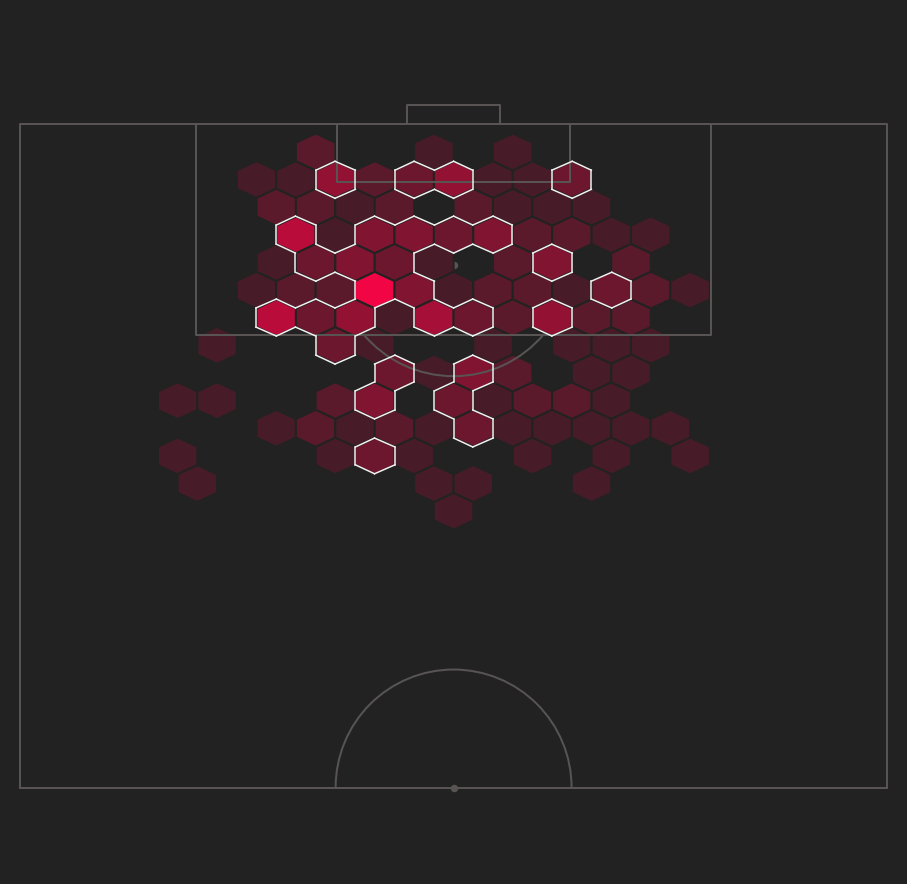

In [27]:
### %run ../src/Pitch.py

rcParams["font.family"] = "sans-serif"

pitch = Pitch(
    line_color="#585454", pitch_color="#222222", orientation="vertical", half=True, plot_arrow=False
)

fig, ax = pitch.create_pitch()

## color-map
cmap_ = [
    "#471c28", "#5a1a2b", "#6c172e", "#811431", "#931133", 
    "#a60f38", "#b90c3a", "#cc0a3e", "#de0740", "#f10545"
]
cmap = colors.ListedColormap(cmap_)

## extent
extent = (0,68,52, 104)

# ax.scatter(68 - a['Y'], a['X'], color="gold", zorder=4)
hexes = ax.hexbin(
    68 - open_data['Y'], open_data['X'], zorder=3, cmap=cmap,
    extent=extent, gridsize=22, ec="#222222", lw=2, bins=None, mincnt=1
)
    
# xy = h.get_offsets()
# v = h.get_array()    

# for count, value in enumerate(v):
#     if value >= 3:
#         temp_text = ax.text(
#             xy[count][0], xy[count][1], int(value), ha="center", va="center",
#             color="#F2F2F2", fontsize=13, fontfamily="Ubuntu", zorder=7
#         )
#         temp_text.set_path_effects(
#             [path_effects.withStroke(linewidth=1, foreground="#F2F2F2")]
#         )
        
# offCoord = [5, 7, 9, 11, 13, 15, 17, 19, 21, 23]

# for index, coord in enumerate(offCoord):
#     # fix radius here
#     hexagon = RegularPolygon((coord, 49), numVertices=6, radius=np.sqrt(2), color=cmap_[index])
#     ax.add_patch(hexagon)   
    
# # add_image("raw.jpg", fig, 0.63, 0.72, 0.14, 0.1, zorder=0)
# ax.imshow(plt.imread("raw.jpg"), extent=[43, 58, 106, 114], zorder=1)
# ax.imshow(plt.imread("../logos/fcb.png"), extent=[0, 6, 107.2, 113.2], zorder=1)
    
# text_coord_hex = [
#     (5, 46, "low", "center", "center", 14, "normal", "normal"), 
#     (14, 46, "frequency", "center", "center", 14, "normal", "normal"), 
#     (23, 46, "high", "center", "center", 14, "normal", "normal"),
#     (44, 48, "This visualization looks at all the\nshots taken from open-play. Shots\nare grouped into most frequent\nshot locations.", "left", "center", 14, "normal", "normal"),
#     (0.3, 52.2, "inspired by @petermckeever", "left", "bottom", 12, "italic", "normal"),
#     (67.7, 52.2, "graphic: @slothfulwave612", "right", "bottom", 12, "italic", "normal"),
#     (55, 106, "Grouping of highest\nfrequency shot location", "left", "bottom", 13, "normal", "normal"),
#     (6.5, 110.5, "Barcelona - Most Frequent Shot Locations", "left", "bottom", 22, "normal", "roman"),
#     (6.5, 108.5, "La Liga | Season 2020/2021", "left", "bottom", 19, "normal", "light")
# ]
    
# for coord in text_coord_hex:
#     temp_text = ax.text(
#         coord[0], coord[1], coord[2], ha=coord[3], va=coord[4],
#         color="#F2F2F2", fontsize=coord[5], zorder=4, fontstyle=coord[6], fontweight=coord[7]
#     )
#     temp_text.set_path_effects(
#         [path_effects.withStroke(linewidth=1, foreground="#222222")]
#     )
    
# ## add rect
# rect = plt.Rectangle((33,52), 2, 2, zorder=3, angle=270, fc="#222222")
# ax.add_patch(rect)  

# ## style for arrows
# style = "Simple, tail_width=0.5, head_width=7, head_length=10"
# kw = dict(arrowstyle=style, color="#D3D3D3", alpha=1, zorder=3)

# ## dotted line
# ax.plot([6, 11.1], [46, 46], color="#F2F2F2", ls=':')
# ax.plot([16.8, 21.75], [46, 46], color="#F2F2F2", ls=':')

# ## plot arrow for population
# a1 = patches.FancyArrowPatch((54,111), (58,108.3), connectionstyle="arc3,rad=-.7", **kw)
# ax.add_patch(a1)

ax.set(xlim=(-1,69), ylim=(45, 113.2))


def get_hexlines(v, h, m):
    """
    Function that returns line coordinates for a hexagon
    given the midpoint of the hexagon.
    
    Args:
        v (float): vertical distance from the center.
        h (float): horizontal distance from the center.
        m (numpy.ndarray): array containing center-coordinates of a hexagon.
        
    Returns:
        numpy.ndarray: containing line coordinates of a hexagon.
    """
    # init hexagon coordinates template array --> clockwise direction
    hex_coord = np.array(
        [
            [ [0, v], [h, v / 2] ],         # first line
            
            [ [h, v / 2], [h, -v / 2] ],    # second line
            
            [ [h, -v / 2], [0, -v] ],       # third line
             
            [ [-h, -v/2], [0, -v] ],        # fourth line
            
            [ [-h, v / 2], [-h, -v / 2] ],  # fifth line
            
            [ [0, v], [-h, v/2] ]           # sixth line
        ]
    )
    
    return hex_coord + m

# get midpoints of hexagons
midpoints = hexes.get_offsets()

# get count for each hexagons
hex_count = hexes.get_array()

# get only those hexagons where count is greater than some number
selected_hex = midpoints[hex_count >= 3]

# vertical distance from the center  (array of distance-values)
dis_vertical = (midpoints[1:, 1] - midpoints[:-1, 1]) / 3       # the number 3 is manually chosen as per the size of hexagon

# horizontal distance from the center (array of distance-values)
dis_horizontal = (midpoints[1:, 0] - midpoints[:-1, 0]) / 2     # the number 2 is manually chosen as per the size of hexagon

# pick only one distance value
dis_vertical = dis_vertical[dis_vertical > 0][0]
dis_horizontal = dis_horizontal[dis_horizontal > 0][0]

# get hexagon line coordinates
lines_coord = np.concatenate(
    [get_hexlines(dis_vertical, dis_horizontal, center) for center in selected_hex]
)

# get all the unique lines with thier counts
unique_lines, count = np.unique(lines_coord.round(1), axis=0, return_counts=True)

# final coordinate whose count is 1 (i.e. unique line coordinates)
final_coords = unique_lines[count == 1]

# plot lines
for line_coord in final_coords:
    ax.plot(
        line_coord[:, 0], line_coord[:, 1], color="#F2F2F2",
        lw=1.5, zorder=3
    )

In [283]:
lines.shape, uls.shape

((174, 2, 2), (150, 2, 2))

In [231]:
lines.shape

(174, 2, 2)

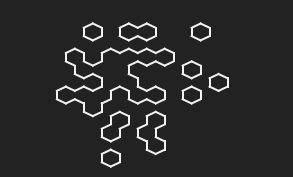

In [164]:
fig_, ax_ = plt.subplots(facecolor="#222222", figsize=(5,3))
ax_.set_facecolor("#222222")

ax_.set(xlim=(10,58), ylim=(76,104))

for l in final_coords: 
    ax_.plot(*l.transpose(),'#F2F2F2',lw=2,scalex=False,scaley=False, zorder=3)
ax_.axis("off")

fig_.savefig("raw.jpg", dpi=500, bbox_inches="tight")

In [304]:
fig.savefig("../plots/test_plots/hexbin_01.jpg", dpi=600, bbox_inches="tight")

## Shots Map 

In [5]:
%run ../src/my_utils
%run ../src/shot_utils

In [6]:
df = pd.read_pickle("../_data_/barca/all_shots.pkl")

# df['X'] = df['X'] + 1.3

player_list = [
    "Lionel Messi", "Antoine Griezmann", "Philippe Coutinho", "Ousmane Dembélé", "Martin Braithwaite", "Trincão",
    "Pedri", "Jordi Alba", "Anssumane Fati", "Miralem Pjanic", "Frenkie de Jong", "Clement Lenglet", "Óscar Mingueza", "Júnior Firpo",
    "Sergiño Dest", "Ronald Araújo", "Sergi Roberto", "Gerard Piqué", "Riqui Puig", "Ilaix Moriba", "Carles Aleñá", "Sergio Busquets"
]

df = df.loc[
    (~df["player"].isin(player_list)) &
    (df["result"] != "OwnGoal") &
    (df["situation"] == "OpenPlay") &
    (df["X"] >= 66.0)
].reset_index(drop=True)

df = swap_shot(df)

In [7]:
center = df.loc[
    ((df['X'] >= 29.9) & (df['X'] <= 39)) &
    ((df['Y'] >= 87.5) & (df['Y'] <= 104)) 
]

right = df.loc[
    ((df['X'] >= 38.8) & (df['X'] <= 47.5)) &
    ((df['Y'] >= 91.3) & (df['Y'] <= 101)) 
]

In [8]:
right

X          Y a_goals         a_team                 date h_a  \
2    46.783999  92.872003       0     Villarreal  2020-09-27 19:00:00   a   
11   45.967999  99.007997       1        Sevilla  2020-10-04 19:00:00   a   
17   41.207999  95.367997       0      Barcelona  2020-10-17 19:00:00   h   
26   42.160000  94.327997       3    Real Madrid  2020-10-24 14:00:00   a   
30   40.663999  99.320000       3    Real Madrid  2020-10-24 14:00:00   a   
33   42.567999  92.976002       1      Barcelona  2020-10-31 20:00:00   h   
41   43.656001  98.800000       2     Real Betis  2020-11-07 15:15:00   a   
44   45.560000  95.263998       0      Barcelona  2020-11-21 20:00:00   h   
53   43.792001  95.680000       1      Barcelona  2020-12-05 20:00:00   h   
57   41.343999  97.967997       0        Levante  2020-12-13 20:00:00   a   
64   39.303999  98.592003       1  Real Sociedad  2020-12-16 20:00:00   a   
96   46.512000  96.720000       3      Barcelona  2021-01-06 20:00:00   h   
109  40.800000  99.840000       0        Osasuna  2020-11-29 13:00:00   a   
124  46.988000  91.936002       1  Athletic Club  2021-01-31 20:00:00   a   
143  41.343999  92.663998       0          Elche  2021-02-24 20:00:00   a   

    h_goals           h_team      id    lastAction match_id minute  \
2         4        Barcelona  379849          Pass    14156     88   
11        1        Barcelona  381531  BallRecovery    14817     31   
17        1           Getafe  382203   Throughball    14830     17   
26        1        Barcelona  383302   Throughball    14836      4   
30        1        Barcelona  383322       Rebound    14836     85   
33        1           Alaves  384815         Cross    14845     16   
41        5        Barcelona  386041       Chipped    14856     54   
44        1  Atletico Madrid  387613          Pass    14867     11   
53        2            Cadiz  390494   Throughball    14885     81   
57        1        Barcelona  392491   Throughball    14898     18   
64        2        Barcelona  393529          None    14905     72   
96        2    Athletic Club  397637   Throughball    14947     11   
109       4        Barcelona  389223          Pass    14875     78   
124       2        Barcelona  402374          Pass    14978     71   
143       3        Barcelona  406392        Aerial    14141     75   

                 player        player_assisted player_id       result season  \
2         Takefusa Kubo                  Mario      8001    SavedShot   2020   
11                 Suso                   None      1129  MissedShots   2020   
17   Nemanja Maksimovic  Juan Camilo Hernández      6076    SavedShot   2020   
26    Federico Valverde          Karim Benzema      6241         Goal   2020   
30           Toni Kroos                   None      2369    SavedShot   2020   
33         Edgar Méndez             Luis Rioja      2088    SavedShot   2020   
41     Antonio Sanabria         Sergio Canales      2217    SavedShot   2020   
44      Marcos Llorente           Ángel Correa      2518   ShotOnPost   2020   
53           Iván Alejo         Álvaro Negredo      6226    SavedShot   2020   
57           Dani Gómez                  Roger      8774  MissedShots   2020   
64       Alexander Isak                   None      5232  BlockedShot   2020   
96       Iñaki Williams                Muniain      2399    SavedShot   2020   
109          Kike Barja            Nacho Vidal      5140    SavedShot   2020   
124      Alex Berenguer                Muniain      5091  MissedShots   2020   
143      Guido Carrillo           Johan Mojica      3424  MissedShots   2020   

      shotType situation        xG  
2     LeftFoot  OpenPlay  0.053753  
11   RightFoot  OpenPlay  0.067321  
17   RightFoot  OpenPlay  0.117279  
26   RightFoot  OpenPlay  0.359312  
30   RightFoot  OpenPlay  0.402121  
33   RightFoot  OpenPlay  0.064134  
41   RightFoot  OpenPlay  0.066980  
44   RightFoot  OpenPlay  0.260859  
53   RightFoot  OpenPlay  0.548779  
57   Rig

In [10]:
right.loc[right["h_team"]=="Cadiz"]

X      Y a_goals     a_team                 date h_a h_goals  \
53  43.792001  95.68       1  Barcelona  2020-12-05 20:00:00   h       2   

   h_team      id   lastAction match_id minute      player player_assisted  \
53  Cadiz  390494  Throughball    14885     81  Iván Alejo  Álvaro Negredo   

   player_id     result season   shotType situation        xG  
53      6226  SavedShot   2020  RightFoot  OpenPlay  0.548779

In [62]:
def center_alpha(item):
    x, y = item
    
    if (x >= 29.9 and x <= 39) and (y >= 87.5 and y <= 104):
        return 1
    else:
        return 0.4

df["alpha"] = df[['X', 'Y']].apply(lambda x: center_alpha(x), axis=1)

# def right_alpha(item):
#     x, y = item
    
#     if (x >= 38.8 and x <= 47.5) and (y >= 91.3 and y <= 101):
#         return 1
#     else:
#         return 0.4

# df["alpha"] = df[['X', 'Y']].apply(lambda x: right_alpha(x), axis=1) 

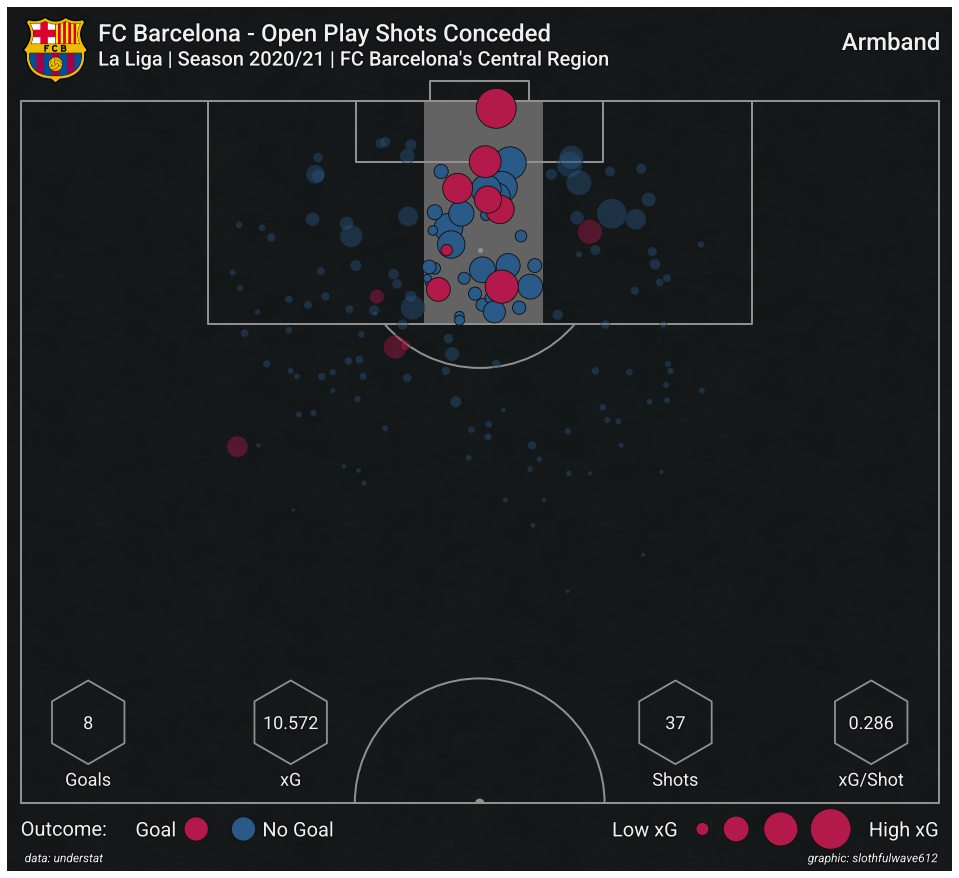

In [64]:
%run ../src/shot_utils
%run ../src/Pitch

text_color = "#F0F0F0"

fig, axes = plt.subplots(figsize=(20,12))

ax = Axes(plt.gcf(),[0, 0, 1, 1],yticks=[],xticks=[],frame_on=False, aspect="equal")
plt.gcf().delaxes(plt.gca())
plt.gcf().add_axes(ax)

image = plt.imread("../backgrounds/black_02.jpg")
ax.imshow(image, zorder=1, extent=[-50, 100, 35, 130])

line_color="#928F8F"
pitch_color="none"

text_dict_title = dict(
    title="FC Barcelona - Open Play Shots Conceded", 
    sub_title="La Liga | Season 2020/21 | FC Barcelona's Central Region",
    logo="Armband"
)

text_dict_credit = dict(
    credit_right="graphic: slothfulwave612", credit_left="data: understat"
)

pitch = Pitch(
    line_color=line_color, pitch_color=pitch_color, orientation="vertical", half=True,
    plot_arrow=False, sxy=(20, 16)
)

shot_map = ShotMap(line_color, "#121212", "#B3194B", "#2A5A87", "#121212")

# create pitch
fig, ax = pitch.create_pitch(figax=(fig,ax))

# # draw shots
ax = shot_map.draw_shots(
    ax, df, True
)

# add stats
ax = shot_map.add_stats(
    ax, center, size=18, fontproperties=font_normal.prop, color=text_color
)

# add legend
ax = shot_map.add_legend(
    ax, fontproperties=font_normal.prop, color=text_color
)

# add title
fig = shot_map.add_title(
    fig, text_dict_title, "../logos/Barcelona.png",
    fontproperties=font_bold.prop, color=text_color
)

# add credit
fig = shot_map.add_credits(
    fig, text_dict_credit, fontproperties=font_italic.prop, color=text_color
)

dual_half_circle(
    (34, 52), radius=0.35, angle=180, ax=ax, colors=("none", line_color), zorder=3
)

# center area
rect = patches.Rectangle(
    xy=(29.9, 87.5), width=8.8, height=16.45, fc="#636364", zorder=2
)
ax.add_patch(rect)

# rect = patches.Rectangle(
#     xy=(38.8, 91.3), width=8.7, height=9.6, fc="#636364", zorder=2
# )
# ax.add_patch(rect)

plt.show()

In [65]:
fig.savefig("../plots/Armband/05_barca_defence/05_shot_map_center.jpg", bbox_inches="tight", dpi=600, pad_inches=0)

1 --> Barca Players

2 --> goalkeeper

3 --> shot

4 --> opponent players

# Progressive Passes

In [36]:
df_1 = pd.read_pickle("prog_lampard.pkl")
df_2 = pd.read_pickle("prog_tuchel.pkl")

df_1 = swap(df_1)
df_2 = swap(df_2)

df_succ_1 = df_1.loc[
    df_1["outcomeType_displayName"] == "Successful"
].reset_index(drop=True).copy()
df_unsucc_1 = df_1.loc[
    df_1["outcomeType_displayName"] == "Unsuccessful"
].reset_index(drop=True).copy()

df_succ_2 = df_2.loc[
    df_2["outcomeType_displayName"] == "Successful"
].reset_index(drop=True).copy()
df_unsucc_2 = df_2.loc[
    df_2["outcomeType_displayName"] == "Unsuccessful"
].reset_index(drop=True).copy()

In [37]:
df_succ_1.shape, df_succ_2.shape, df_unsucc_1.shape, df_unsucc_2.shape

((113, 45), (23, 45), (37, 45), (10, 45))

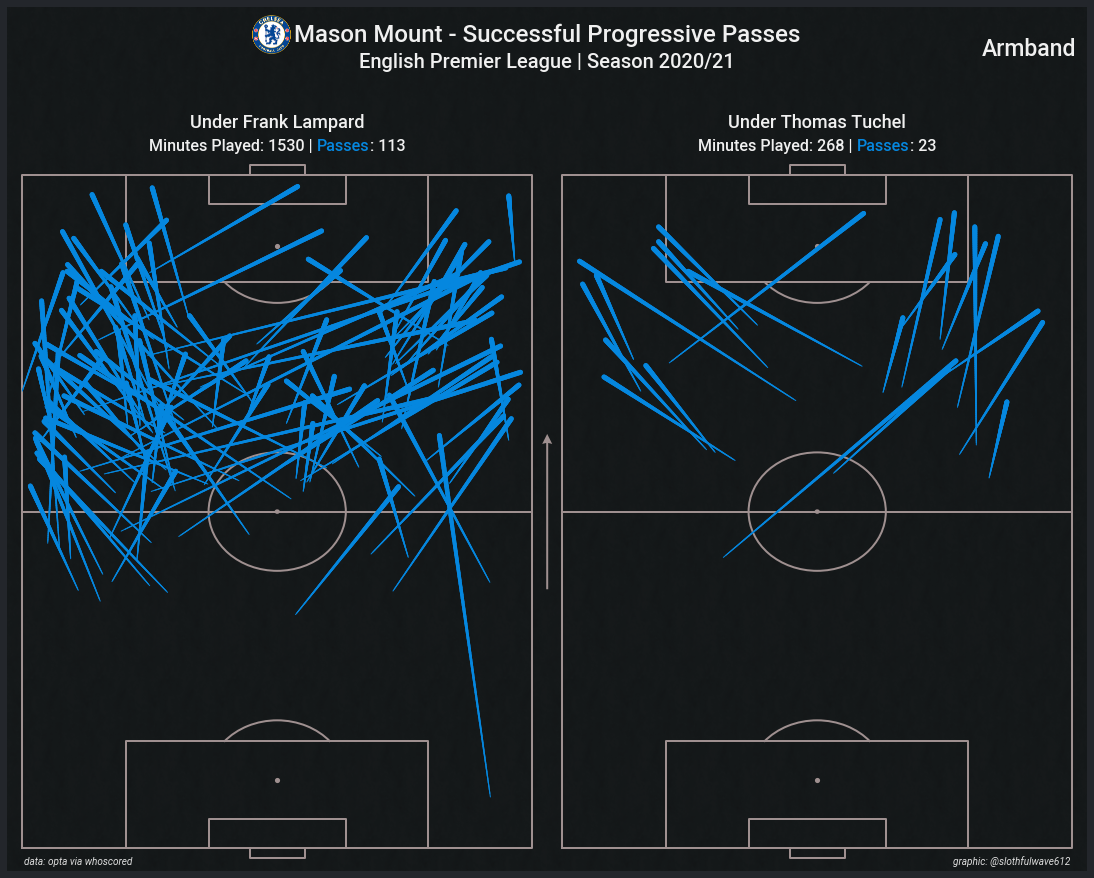

In [45]:
%run ../src/Pitch
from mplsoccer.pitch import Pitch as p

text_color="#F0F0F0"

fig, axes = plt.subplots(1, 2, figsize=(15, 12), facecolor="#23262b")

image = plt.imread("../backgrounds/black_02.jpg")

line_color = "#9F9090"
pitch_color = "none"

pitch = Pitch(
    line_color=line_color, pitch_color=pitch_color, orientation="vertical", half=False,
    plot_arrow=False, sxy=(20, 16)
)

df_list = [
    [df_succ_1, df_unsucc_1],
    [df_succ_2, df_unsucc_2]
]

pitch_ = p()
arrow = Arrows.Arrow(arrow_type="simple_arrows")

for i, ax in enumerate(fig.get_axes()):
    ax.imshow(image, extent=[-2, 70, -10.2, 135], aspect="auto")
    
    fig, ax = pitch.create_pitch(figax=(fig, ax))
    
    dual_half_circle(
        (34, 52), radius=0.35, angle=180, ax=ax, colors=(line_color, line_color), zorder=3
    )
    
    # unsuccessful passes
#     pitch_.lines(
#         df_list[i][1]['x'], df_list[i][1]['y'], df_list[i][1]["endX"], df_list[i][1]["endY"], 
#         capstyle="round", lw=5, transparent=True, comet=True, 
#         facecolor="#4D4747", edgecolor="#4D4747", ax=ax, zorder=4
#     )
    
    # successful passes
    pitch_.lines(
        df_list[i][0]['x'], df_list[i][0]['y'], df_list[i][0]["endX"], df_list[i][0]["endY"], 
        capstyle="round", lw=5, transparent=True, comet=True, 
        facecolor="#0587df", edgecolor="#0587df", ax=ax, zorder=4
    )
    
    ax.set(xlim=(-2, 70), ylim=(-3.5, 130))
    
    if i == 0:
        ax.text(
            0.3, -2.5, "data: opta via whoscored", size=10, 
            fontproperties=font_italic.prop, color="#DEDEDE", zorder=2
        )
        arrow.plot_arrow(
            ax, 70, 40, 70, 64, color="#9F9090",
            width=2, headlength=5, headwidth=5, zorder=4
        )
    else:
        ax.text(
            67.7, -2.5, "graphic: @slothfulwave612", size=10, 
            fontproperties=font_italic.prop, color="#DEDEDE", zorder=2, ha="right"
        )
        arrow.plot_arrow(
            ax, -2, 40, -2, 64, color="#9F9090",
            width=2, headlength=5, headwidth=5, zorder=4
        )
    
    ax.axis("off")

fig.text(
    0.5, 0.96, "Mason Mount - Successful Progressive Passes", ha="center", size=24, 
    fontproperties=font_bold.prop, color=text_color
)
fig.text(
    0.5, 0.93, "English Premier League | Season 2020/21", ha="center", size=20, 
    fontproperties=font_bold.prop, color=text_color
)

fig.text(
    0.25, 0.86, "Under Frank Lampard", ha="center", size=18, 
    fontproperties=font_bold.prop, color=text_color
)
fig_text(
    0.25, 0.83, f"Minutes Played: 1530 | <Passes>: {len(df_succ_1)}", 
    highlight_colors=["#0587df"],
    ha="center", size=16, 
    fontproperties=font_bold.prop, color=text_color
)

fig.text(
    0.75, 0.86, "Under Thomas Tuchel", ha="center", size=18, 
    fontproperties=font_bold.prop, color=text_color
)
fig_text(
    0.75, 0.83, f"Minutes Played: 268 | <Passes>: {len(df_succ_2)}", 
    highlight_colors=["#0587df"],
    ha="center", size=16, 
    fontproperties=font_bold.prop, color=text_color
)

fig = add_image(
    "../logos/Chelsea.png", fig, 0.222, 0.945, 0.045, 0.045
)

fig.text(
    0.99, 0.943, "Armband", color=text_color, 
    fontproperties=font_bold.prop, size=23, ha="right"
)

plt.subplots_adjust(0, 0, 1, 1, wspace=0, hspace=0)

In [46]:
fig.savefig("../plots/Armband/04_mason_mount/08_prog.jpg", dpi=500, bbox_inches="tight", pad_inches=0)

## Passes To Penalty Area

In [47]:
def swap(df):
    m = pd.to_numeric(df['x']).notna()

    df.loc[m,['x','y']] = df.loc[m,['y','x']].values
    df.loc[m,['endX','endY']] = df.loc[m,['endY','endX']].values
    
    df['endX'] = 68 - df['endX']
    df['x'] = 68 - df['x']

    return df

df_1 = pd.read_pickle("pen_lampard.pkl")
df_2 = pd.read_pickle("pen_tuchel.pkl")

df_1 = swap(df_1)
df_2 = swap(df_2)

df_succ_1 = df_1.loc[
    df_1["outcomeType_displayName"] == "Successful"
].reset_index(drop=True).copy()
df_unsucc_1 = df_1.loc[
    df_1["outcomeType_displayName"] == "Unsuccessful"
].reset_index(drop=True).copy()

df_succ_2 = df_2.loc[
    df_2["outcomeType_displayName"] == "Successful"
].reset_index(drop=True).copy()
df_unsucc_2 = df_2.loc[
    df_2["outcomeType_displayName"] == "Unsuccessful"
].reset_index(drop=True).copy()

In [48]:
df_succ_1.shape, df_succ_2.shape, df_unsucc_1.shape, df_unsucc_2.shape

((15, 45), (9, 45), (23, 45), (7, 45))

In [49]:
cmap = sns.color_palette("dark:#0587df", as_cmap=True)
color_list = []

for i in range(cmap.N):
    rgba = cmap(i)
    color_list.append(mpl.colors.rgb2hex(rgba))
    
# for i in range(50):
#     color_list[i] = "#222222"

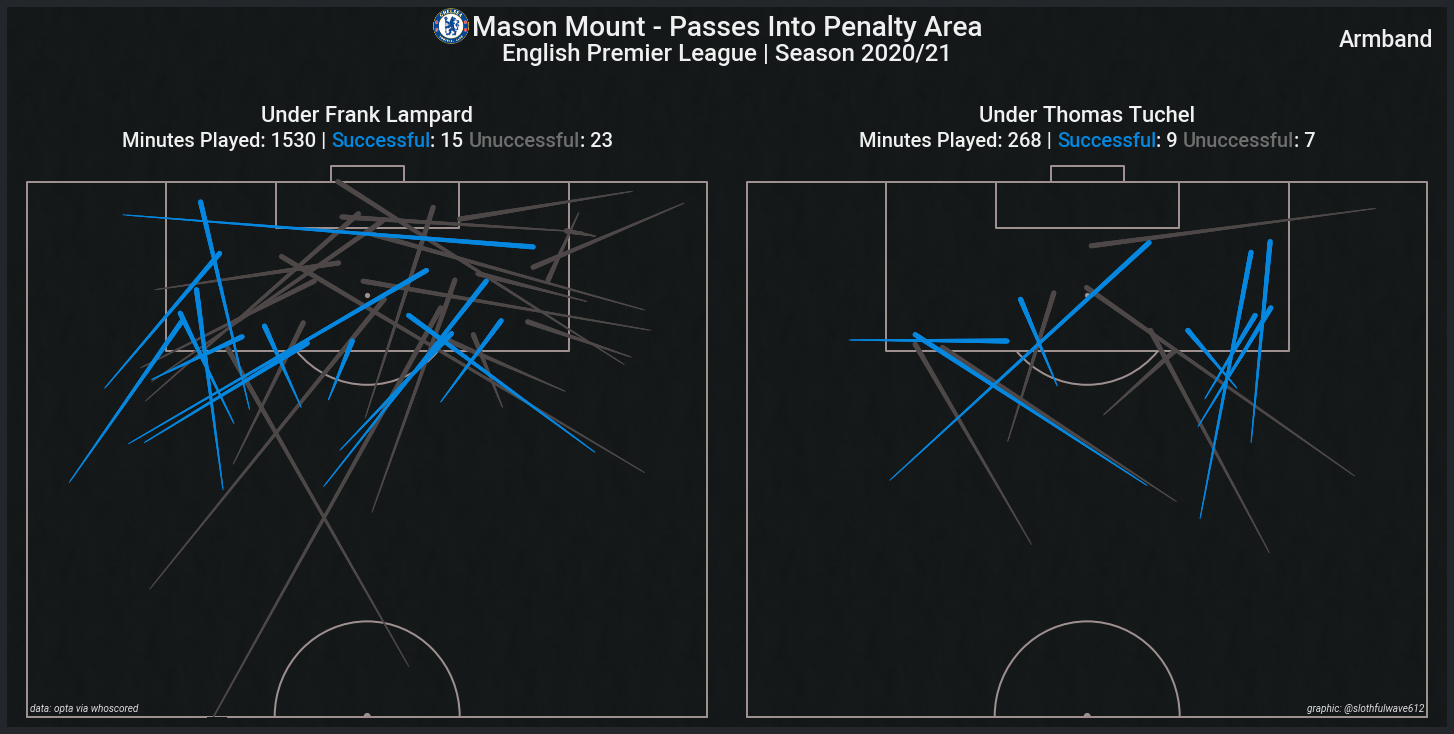

In [51]:
from mplsoccer.pitch import Pitch as p

text_color="#F0F0F0"

fig, axes = plt.subplots(1, 2, figsize=(20,10), facecolor="#23262b")

image = plt.imread("../backgrounds/black_02.jpg")

line_color = "#9F9090"
pitch_color = "none"

pitch = Pitch(
    line_color=line_color, pitch_color=pitch_color, orientation="vertical", half=True,
    plot_arrow=False, sxy=(20, 16)
)

df_list = [
    [df_succ_1, df_unsucc_1],
    [df_succ_2, df_unsucc_2]
]

pitch_ = p()

for i, ax in enumerate(fig.get_axes()):
    ax.imshow(image, extent=[-2, 70, -10.2, 125], aspect="auto")
    
    fig, ax = pitch.create_pitch(figax=(fig, ax))
    
    dual_half_circle(
        (34, 52), radius=0.35, angle=180, ax=ax, colors=("none", line_color), zorder=3
    )
    
    # unsuccessful passes
    pitch_.lines(
        df_list[i][1]['x'], df_list[i][1]['y'], df_list[i][1]["endX"], df_list[i][1]["endY"], 
        capstyle="round", lw=5, transparent=True, comet=True, 
        facecolor="#4D4747", edgecolor="#4D4747", ax=ax, zorder=4
    )
    
    # successful passes
    pitch_.lines(
        df_list[i][0]['x'], df_list[i][0]['y'], df_list[i][0]["endX"], df_list[i][0]["endY"], 
        capstyle="round", lw=5, transparent=True, comet=True, 
        facecolor="#0587df", edgecolor="#0587df", ax=ax, zorder=4
    )
    
    ax.set(xlim=(-2, 70), ylim=(51, 121))
    
    if i == 0:
        ax.imshow(image, zorder=4, extent=[18, 20, 50, 51.9], aspect="auto")
        ax.text(
            0.3, 52.5, "data: opta via whoscored", size=10, 
            fontproperties=font_italic.prop, color="#DEDEDE", zorder=2
        )
    else:
        ax.text(
            67.7, 52.5, "graphic: @slothfulwave612", size=10, 
            fontproperties=font_italic.prop, color="#DEDEDE", zorder=2, ha="right"
        )
    
    ax.axis("off")

fig.text(
    0.5, 0.96, "Mason Mount - Passes Into Penalty Area", ha="center", size=28, 
    fontproperties=font_bold.prop, color=text_color
)
fig.text(
    0.5, 0.925, "English Premier League | Season 2020/21", ha="center", size=24, 
    fontproperties=font_bold.prop, color=text_color
)

fig.text(
    0.25, 0.84, "Under Frank Lampard", ha="center", size=22, 
    fontproperties=font_bold.prop, color=text_color
)
fig_text(
    0.25, 0.8, f"Minutes Played: 1530 | <Successful>: {len(df_succ_1)} <Unuccessful>: {len(df_unsucc_1)}", 
    highlight_colors=["#0587df", "#6F6F6F"],
    ha="center", size=20, 
    fontproperties=font_bold.prop, color=text_color
)

fig.text(
    0.75, 0.84, "Under Thomas Tuchel", ha="center", size=22, 
    fontproperties=font_bold.prop, color=text_color
)
fig_text(
    0.75, 0.8, f"Minutes Played: 268 | <Successful>: {len(df_succ_2)} <Unuccessful>: {len(df_unsucc_2)}", 
    highlight_colors=["#0587df", "#6F6F6F"],
    ha="center", size=20, 
    fontproperties=font_bold.prop, color=text_color
)

fig = add_image(
    "../logos/Chelsea.png", fig, 0.283, 0.948, 0.05, 0.05
)

fig.text(
    0.99, 0.945, "Armband", color=text_color, 
    fontproperties=font_bold.prop, size=23, ha="right"
)

plt.subplots_adjust(0, 0, 1, 1, wspace=0, hspace=0)

In [52]:
fig.savefig("../plots/Armband/04_mason_mount/07_pen_box.jpg", dpi=500, bbox_inches="tight", pad_inches=0)

In [18]:
from mplsoccer.pitch import Pitch as p

%run ../src/Pitch
%run ../src/heatmap_
%run ../src/shot_utils

fig, axes = plt.subplots(figsize=(20,12))

text_dict_title = dict(
    title="Mason Mount - Passes Into Penalty Area", 
    sub_title="English Premier League | Season 2020/21",
    logo="Armband"
)

ax = Axes(plt.gcf(),[0, 0, 1, 1],yticks=[],xticks=[],frame_on=False, aspect="equal")
plt.gcf().delaxes(plt.gca())
plt.gcf().add_axes(ax)

image = plt.imread("black_03.jpg")
ax.imshow(image, zorder=1, extent=[-50, 100, 35, 130])

line_color="#9F9090"
pitch_color="none"

pitch = Pitch.Pitch(
    line_color=line_color, pitch_color=pitch_color, orientation="vertical", half=True,
    plot_arrow=False, sxy=(20, 16)
)

# create pitch
fig, ax = pitch.create_pitch(figax=(fig,ax))

# set limit
ax.set(xlim=(-1, 69), ylim=(51, 111))
n
dual_half_circle(
    (34, 52), radius=0.35, angle=180, ax=ax, colors=("none", line_color), zorder=3
)

cmap = mpl.colors.ListedColormap(color_list)

# ax.imshow(matrix, extent=[0, 68, 52, 104], zorder=2, cmap=cmap, interpolation="bicubic")

pitch = p()

# rectangle = patches.Rectangle(
#     (13.84, 87.5), 40.31, 16.5, color="#222222", zorder=3
# )
# ax.add_patch(rectangle)
# ax.scatter(34, 93, color=line_color, s=40, zorder=4)

lc2 = pitch.lines(
    df_unsucc['x'], df_unsucc['y'], df_unsucc["endX"], df_unsucc["endY"], capstyle="round",
    lw=5, transparent=True, comet=True, facecolor="#4D4747", edgecolor="#4D4747", ax=ax, zorder=4
)

lc1 = pitch.lines(
    df_succ['x'], df_succ['y'], df_succ["endX"], df_succ["endY"], capstyle="round",
    lw=5, transparent=True, comet=True, facecolor="#0587df", edgecolor="#0587df", ax=ax, zorder=4
)

# title list
text_list_fig = [
    dict(x=0.215, y=0.96, s=text_dict_title["title"], size=24, fontproperties=font_bold.prop, color="#F0F0F0"),
#     dict(x=0.215, y=0.93, s=text_dict_title["sub_title"], size=20, fontproperties=font_bold.prop, color="#F0F0F0"),
    dict(x=0.84, y=0.95, s=text_dict_title["logo"], size=24, ha="right", fontproperties=font_bold.prop, color="#F0F0F0"),
]

# plot text
for text in text_list_fig:
    plot_text_fig(fig, pitch_color, **text)

# add image
fig = my_utils.add_image(
    "../logos/Chelsea.png", fig, 0.145, 0.91, 0.08, 0.08
)

fig_text(
    0.215, 0.93, text_dict_title["sub_title"] + f" | <Successful: {len(df_succ)}>, <Unsuccessful: {len(df_unsucc)}>", 
    highlight_colors=["#0587df", "#6F6F6F"], size=20,
    fig=fig, color="#F0F0F0", fontproperties=font_bold.prop
)

ax.text(0.3, 52.5, "data: opta via whoscored", size=12, fontproperties=font_italic.prop, color="#F0F0F0", zorder=2)
ax.text(67.7, 52.5, "graphic: @slothfulwave612", size=12, fontproperties=font_italic.prop, color="#F0F0F0", zorder=2, ha="right")

ax.imshow(image, zorder=4, extent=[18, 20, 50, 51.9])

plt.show()

In [105]:
fig.savefig("../plots/Armband/04_mason_mount/05_passes_pen.jpg", dpi=400, bbox_inches="tight", pad_inches=0)

## Scraper

In [112]:
np.linspace(0.01, 1, 5)

array([0.01  , 0.2575, 0.505 , 0.7525, 1.    ])

In [4]:
def scrape(link, var_name):
        """
        Function to scrape data from the website.

        Args:
            link (str): link for the webpage to be scrapped.
            var_name (str): variable to be extracted.

        Returns:
            json-data
        """ 
        ## ready the chrome-drivers
        driver = webdriver.Chrome("/home/slothfulwave612/chromedriver_linux64/chromedriver")

        ## give the link
        driver.get(link)

        ## get the data
        content = driver.execute_script(f"return {var_name};")

        ## close the driver
        driver.close()

        return content

In [5]:
shot_data = pd.DataFrame(scrape("https://understat.com/player/1228", "shotsData"))

In [9]:
shot_data = shot_data[
    (shot_data["a_team"] == "Manchester United") | 
    (shot_data["h_team"] == "Manchester United")
]

In [10]:
shot_data.to_csv("bruno_shots.csv", index=False)

## Beeswarm Plot

In [35]:
def position(x):
    for pos in x.split(','):
        if pos in ["MF", "FW"]:
            return True
    return False

df = pd.read_pickle("../_data_/top_5.pkl")

df = df[
    ["player", "position", "minutes", "minutes_90s", "xg", "xa", "assisted_shots", "progressive_passes", "sca", "passes_into_penalty_area"]
]

for i in df.columns[4:]:
    df[i] = round(df[i] / df["minutes_90s"], 2)

df["is_pos"] = df["position"].apply(
    lambda x: position(x)
)

df = df.loc[
    (df["is_pos"] == True) &
    (df["minutes"] >= 1200)
].reset_index(drop=True)

In [36]:
df.head()

player position  minutes  minutes_90s    xg    xa  \
0         Che Adams       FW   1713.0         19.0  0.26  0.23   
1    Ezgjan Alioski    DF,MF   1351.0         15.0  0.07  0.10   
2    Miguel Almirón    MF,FW   1370.0         15.2  0.12  0.12   
3      Ethan Ampadu    DF,MF   1331.0         14.8  0.02  0.05   
4  Stuart Armstrong       MF   1484.0         16.5  0.08  0.08   

   assisted_shots  progressive_passes   sca  passes_into_penalty_area  is_pos  
0            1.16                2.00  2.11                      0.63    True  
1            1.00                4.00  2.07                      1.13    True  
2            1.32                2.57  2.63                      1.25    True  
3            0.54                3.92  0.81                      0.88    True  
4            1.09                3.27  2.18                      1.03    True

In [37]:
df.shape

(389, 11)

In [38]:
cols = df.columns[4:-1]
main = df[df["player"] == "Mason Mount"]

In [39]:
main

player position  minutes  minutes_90s    xg   xa  assisted_shots  \
55  Mason Mount    MF,FW   1798.0         20.0  0.15  0.2             2.9   

    progressive_passes   sca  passes_into_penalty_area  is_pos  
55                 5.8  4.45                       1.6    True

In [40]:
%run ../src/beeswarm

df_list = []

for col in cols:
    bs = beeswarm([df[col]], method="center")
    df_list.append(bs)

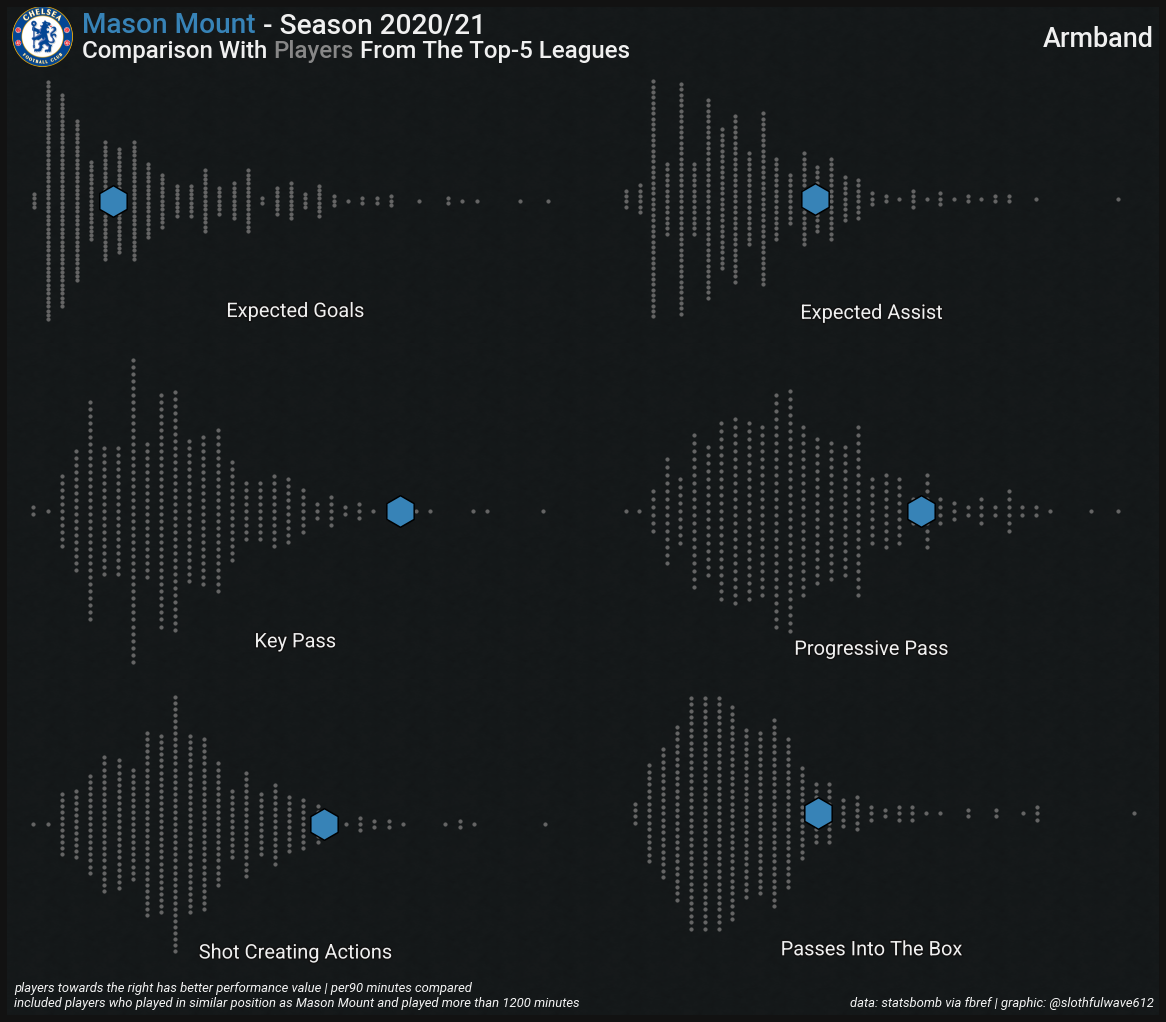

In [141]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,14), facecolor="#121212")

n = 0

image = plt.imread("../backgrounds/black_02.jpg")

x_lim = [
    (-0.06, 1.08), (-0.05, 0.57), (-0.24, 4.37),
    (-0.6, 10.3), (-0.19, 8.25), (-0.5, 4.65)
]

y_lim = [
    (-0.11, 0.15), (-0.09, 0.12), (-0.08, 0.08),
    (-0.07, 0.07), (-0.105, 0.08), (-0.105, 0.07)
]

text = ["Expected Goals", "Expected Assist", "Key Pass", "Progressive Pass", "Shot Creating Actions", "Passes Into The Box"]

y = [-0.09, -0.075, -0.065, -0.06, -0.074, -0.074]

for n, ax in enumerate(fig.get_axes()):
    ax.set_facecolor("#121212")
    
    ax.scatter(
        df_list[n]["ynew"], df_list[n]["xnew"], s=10, color="#656565", zorder=2
    )
    
    ax.imshow(image, extent=[x_lim[n][0], x_lim[n][1], y_lim[n][0], y_lim[n][1]], aspect="auto", zorder=1)
    
    plot_text_ax(
        ax, "#121212", x=(x_lim[n][0] + x_lim[n][1]) / 2, y=y[n], 
        s=text[n],
        size=20, color="#F0F0F0", ha='center', fontproperties=font_normal.prop
    )
    
    ax.scatter(
        main[cols[n]], 0, s=1000, fc="#3783B7", ec="#000000", zorder=3, marker="h", lw=1.5
    )
    
    ax.axis("off")
    
fig = add_image(
    "../logos/Chelsea.png", fig, 0, 0.94, 0.06, 0.06
)

fig_text(
    0.065, 0.968, "<Mason Mount> - Season 2020/21", color="#F0F0F0", highlight_colors=["#3783B7"], size=28, fontproperties=font_bold.prop
)
fig_text(
    0.065, 0.945, "Comparison With <Players> From The Top-5 Leagues", color="#F0F0F0", highlight_colors=["#878787"], size=24, fontproperties=font_bold.prop
)
fig_text(
    0.995, 0.955, "Armband", color="#F0F0F0", highlight_colors=["#3783B7"], size=27, fontproperties=font_bold.prop, ha="right"
)

fig_text(
    0.006, 0.02, "players towards the right has better performance value | per90 minutes compared", 
    color="#F5F5F5", highlight_colors=["#3783B7"], size=13, fontproperties=font_italic.prop
)
fig_text(
    0.006, 0.005, "included players who played in similar position as Mason Mount and played more than 1200 minutes", 
    color="#F5F5F5", highlight_colors=["#3783B7"], size=13, fontproperties=font_italic.prop
)
fig_text(
    0.995, 0.005, "data: statsbomb via fbref | graphic: @slothfulwave612", 
    color="#F5F5F5", highlight_colors=["#3783B7"], size=13, fontproperties=font_italic.prop, ha="right"
)
    
plt.subplots_adjust(0, 0, 1, 1, wspace=0, hspace=0)

In [142]:
fig.savefig("../plots/Armband/04_mason_mount/06_comparison_.jpg", dpi=500, bbox_inches="tight", pad_inches=0)